In [1]:
import os

# Set the environment variable
os.environ['DATA_DIRECTORY'] = '/Users/liamk/research-project-erc20-governance/data'

# Now you can access it
path = os.environ['DATA_DIRECTORY']
print(f"The data directory is set to: {path}")


The data directory is set to: /Users/liamk/research-project-erc20-governance/data


In [2]:
import os

# Set the environment variable (for demonstration purposes)
os.environ['DATA_DIRECTORY'] = '/Users/liamk/research-project-erc20-governance/data'

# Access the environment variable
data_directory = os.environ['DATA_DIRECTORY']

# Use the path in your code
print(f"The data directory is set to: {data_directory}")

# Example: List all files in the data directory
for root, dirs, files in os.walk(data_directory):
    for file in files:
        print(os.path.join(root, file))

The data directory is set to: /Users/liamk/research-project-erc20-governance/data
/Users/liamk/research-project-erc20-governance/data/final_token_selection.csv
/Users/liamk/research-project-erc20-governance/data/snapshot_selection.csv
/Users/liamk/research-project-erc20-governance/data/price_table.csv
/Users/liamk/research-project-erc20-governance/data/address_labels/address_labels_targeted_dox.csv
/Users/liamk/research-project-erc20-governance/data/address_labels/address_labels_projects.csv
/Users/liamk/research-project-erc20-governance/data/address_labels/df_know_burner_addresses.csv
/Users/liamk/research-project-erc20-governance/data/address_labels/address_labels_cefi.csv
/Users/liamk/research-project-erc20-governance/data/address_labels/dex_lp_pair_addresses.csv
/Users/liamk/research-project-erc20-governance/data/address_labels/address_labels_kaggle.csv
/Users/liamk/research-project-erc20-governance/data/raw_data_collection/token_transfers.ipynb
/Users/liamk/research-project-erc20-

In [15]:
import pandas as pd
import numpy as np
import networkx as nx 

import matplotlib.pyplot as plt
from ast import literal_eval

from os.path import join
import os

# from token_projection.token_projection import *
# from utilities.metrics_and_tests import * 
# from utilities.utils import * 

from dotenv import load_dotenv
load_dotenv()  

path = os.environ['DATA_DIRECTORY']
#covalent_key = os.environ['COVALENTHQ_API_KEY']
df_snapshots = pd.read_csv('../data/snapshot_selection.csv')
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
df_tokens = pd.read_csv("../data/final_token_selection.csv")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
address_to_symbol

# df_tokens = pd.read_csv('../assets/df_final_token_selection_20230813.csv')

# remove burner addresses 
known_burner_addresses = ['0x0000000000000000000000000000000000000000',
                        '0x0000000000000000000000000000000000000000',
                        '0x0000000000000000000000000000000000000001',
                        '0x0000000000000000000000000000000000000002',
                        '0x0000000000000000000000000000000000000003',
                        '0x0000000000000000000000000000000000000004',
                        '0x0000000000000000000000000000000000000005',
                        '0x0000000000000000000000000000000000000006',
                        '0x0000000000000000000000000000000000000007',
                        '0x000000000000000000000000000000000000dead']

### NOTE: YOU NEED TO RE-RUN TOKEN VALIDATION --> REMOVAL OF BITDAO CAUSED THIS.
### ALSO DOUBLE CHECK THAT BITDAO IS THE PROBLEM AND NOT AURA !!! 

In [16]:
import pandas as pd
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()  

# Set the base data directory path from environment variable
data_directory = os.environ.get('DATA_DIRECTORY')

# Verify if the DATA_DIRECTORY environment variable is set
if not data_directory:
    raise EnvironmentError("DATA_DIRECTORY environment variable is not set.")

# Define file paths
snapshot_file_path = os.path.join(data_directory, 'snapshot_selection.csv')
token_file_path = os.path.join(data_directory, 'final_token_selection.csv')

# Check if the files exist
if not os.path.exists(snapshot_file_path):
    print(f"File does not exist: {snapshot_file_path}")
else:
    print(f"File exists: {snapshot_file_path}")

if not os.path.exists(token_file_path):
    print(f"File does not exist: {token_file_path}")
else:
    print(f"File exists: {token_file_path}")

# Read the snapshot selection CSV file
try:
    df_snapshots = pd.read_csv(snapshot_file_path)
    df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format
    print("Snapshot selection file loaded successfully. Here are the first few rows:")
    print(df_snapshots.head())
except Exception as e:
    print(f"Error reading snapshot selection file: {e}")

# Read the final token selection CSV file
try:
    df_tokens = pd.read_csv(token_file_path)
    print("Final token selection file loaded successfully. Here are the first few rows:")
    print(df_tokens.head())
except Exception as e:
    print(f"Error reading final token selection file: {e}")

# Convert DataFrame to a dictionary where keys are addresses and values are symbols
try:
    address_to_symbol = pd.Series(df_tokens['symbol'].values, index=df_tokens['address']).to_dict()
    print("Address to symbol dictionary created successfully.")
    print(list(address_to_symbol.items())[:5])  # Print the first 5 items
except Exception as e:
    print(f"Error creating address to symbol dictionary: {e}")

# Known burner addresses
known_burner_addresses = [
    '0x0000000000000000000000000000000000000000',
    '0x0000000000000000000000000000000000000001',
    '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003',
    '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005',
    '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007',
    '0x000000000000000000000000000000000000dead'
]

print("Known burner addresses list:")
print(known_burner_addresses)

File exists: /Users/liamk/research-project-erc20-governance/data/snapshot_selection.csv
File exists: /Users/liamk/research-project-erc20-governance/data/final_token_selection.csv
Snapshot selection file loaded successfully. Here are the first few rows:
   Nr.  Block Height       Date
0    1       7962629 2019-06-15
1    2       8155117 2019-07-15
2    3       8354625 2019-08-15
3    4       8553607 2019-09-15
4    5       8745378 2019-10-15
Final token selection file loaded successfully. Here are the first few rows:
      coingecko_id     name    VL    MC  \
0          uniswap  Uniswap  True  True   
1             aave     Aave  True  True   
2         lido-dao     Lido  True  True   
3            maker    Maker  True  True   
4  curve-dao-token    Curve  True  True   

                                      address symbol  
0  0x1f9840a85d5af5bf1d1762f925bdaddc4201f984    UNI  
1  0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9   AAVE  
2  0x5a98fcbea516cf06857215779fd812ca3bef1b32    LDO  

In [5]:
import sys
import os

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from src.analysis.clique_analysis import * 
from src.visualisations.wallet_network_projections_visualisations import * 

In [6]:
import sys
import os

# Get the current working directory
current_dir = os.getcwd()
print(f"Current Directory: {current_dir}")

# Add the parent directory to the Python path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)
print(f"Parent Directory added to sys.path: {parent_dir}")

# Verify the updated sys.path
print("Updated sys.path:")
for path in sys.path:
    print(path)

# Import the modules
try:
    from src.analysis.clique_analysis import * 
    from src.visualisations.wallet_network_projections_visualisations import * 
    print("Modules imported successfully.")
except ImportError as e:
    print(f"Error importing modules: {e}")


Current Directory: /Users/liamk/research-project-erc20-governance/notebooks
Parent Directory added to sys.path: /Users/liamk/research-project-erc20-governance
Updated sys.path:
/Users/liamk/research-project-erc20-governance/notebooks
/Users/liamk/anaconda3/lib/python311.zip
/Users/liamk/anaconda3/lib/python3.11
/Users/liamk/anaconda3/lib/python3.11/lib-dynload

/Users/liamk/anaconda3/lib/python3.11/site-packages
/Users/liamk/anaconda3/lib/python3.11/site-packages/aeosa
/Users/liamk/research-project-erc20-governance
/Users/liamk/research-project-erc20-governance
Modules imported successfully.


In [7]:
import os
import pandas as pd
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
    
    return graphs, dates

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")


Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

Loaded graph for snapshot 14391029
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14589816.graphml
Loaded graph for snapshot 14589816
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14779829.graphml
Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365
Loaded 18 graphs.
Snapshot: 11659570, Number of nodes: 118, Number of edges: 883
Snapshot: 11861210, Number of nodes: 114, Number of edges: 817
Snapshot: 12043054, Number of nodes: 116, Number of edges: 864
Snapshot: 12244515, Number of nodes: 114, Number of edges: 831
Snapshot: 12438842, Number of nodes: 119, Number of edges: 852
Snapshot: 12638919, Number of nodes: 130, Number of edges: 890
Snapshot: 12831436, Number of nodes: 1

In [8]:
import os
import pandas as pd
import networkx as nx
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory directly to the local folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    missing_snapshots = []
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
            missing_snapshots.append(snapshot)
    
    return graphs, dates, missing_snapshots

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates, missing_snapshots = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Print the loaded graphs for verification
print(f"Loaded {len(graphs)} graphs.")
for snapshot, graph in graphs.items():
    print(f"Snapshot: {snapshot}, Number of nodes: {len(graph.nodes)}, Number of edges: {len(graph.edges)}")

# Print missing snapshots
if missing_snapshots:
    print(f"Missing graph files for snapshots: {missing_snapshots}")
else:
    print("All graph files were found.")

Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_gra

Loaded graph for snapshot 13809597
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14009885.graphml
Loaded graph for snapshot 14009885
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14210564.graphml
Loaded graph for snapshot 14210564
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14391029.graphml
Loaded graph for snapshot 14391029
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14589816.graphml
Loaded graph for snapshot 14589816
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14779829.graphml
Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_project

# # Generating the graphs


In [9]:
import os
from os.path import join
from dotenv import load_dotenv
import dask.dataframe as dd
from tqdm import tqdm
import pandas as pd
import time
import numpy as np
import networkx as nx

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

load_dotenv()

path = os.environ['DATA_DIRECTORY']

# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply

KNOWN_BURNER_ADDRESSES = set([
    '0x0000000000000000000000000000000000000000', '0x000000000000000000000000000000000000dead',
    '0x0000000000000000000000000000000000000001', '0x0000000000000000000000000000000000000002',
    '0x0000000000000000000000000000000000000003', '0x0000000000000000000000000000000000000004',
    '0x0000000000000000000000000000000000000005', '0x0000000000000000000000000000000000000006',
    '0x0000000000000000000000000000000000000007'
])

# Helper function to process each snapshot
def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    dtypes = {
        'label': 'object',  # Specify dtype for the label column
        # Add other columns with their expected dtypes if necessary
    }
    
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )   
    
    # Efficient filtering using Dask
    ddf = ddf[(ddf['value'] > 0) & 
              (ddf.pct_supply > SUPPLY_THRESHOLD) &
              (~ddf['address'].isin(KNOWN_BURNER_ADDRESSES)) & 
              (ddf['token_address'].isin(df_addresses['address']))]

    present_addresses = ddf['address'].unique().compute()
    pop_size = len(ddf['token_address'].unique().compute())

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf.compute(), pop_size)

    G = nx.Graph()
    G.add_edges_from(validated_links['combination'])

    # Store the graph with a name based on snapshot height
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

# Main function to load, process data, and generate network graphs
def generate_network_graphs():
    df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
    df_addresses = pd.read_csv(ADDRESS_CSV_PATH)

    snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']

    total_snapshots = len(snapshots)
    total_time = 0

    with tqdm(total=total_snapshots) as pbar:
        for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)

if __name__ == "__main__":
    generate_network_graphs()

Calculating p-values: 100%|███████████████| 6903/6903 [00:06<00:00, 1111.83it/s]
  6%| | 1/18 [00:11<03:16, 11.57s/it, Snapshot=1.17e+7, Time per snapshot=11.57s
Calculating p-values: 100%|███████████████| 6441/6441 [00:06<00:00, 1060.68it/s]
 11%| | 2/18 [00:23<03:10, 11.88s/it, Snapshot=1.19e+7, Time per snapshot=11.83s
Calculating p-values: 100%|███████████████| 6670/6670 [00:05<00:00, 1260.91it/s]
 17%|▏| 3/18 [00:34<02:53, 11.57s/it, Snapshot=1.2e+7, Time per snapshot=11.62s,
Calculating p-values: 100%|███████████████| 6555/6555 [00:05<00:00, 1260.66it/s]
 22%|▏| 4/18 [00:46<02:40, 11.48s/it, Snapshot=1.22e+7, Time per snapshot=11.55s
Calculating p-values: 100%|███████████████| 7140/7140 [00:05<00:00, 1301.57it/s]
 28%|▎| 5/18 [00:58<02:33, 11.83s/it, Snapshot=1.24e+7, Time per snapshot=11.73s
Calculating p-values: 100%|███████████████| 8515/8515 [00:07<00:00, 1105.13it/s]
 33%|▎| 6/18 [01:13<02:34, 12.87s/it, Snapshot=1.26e+7, Time per snapshot=12.26s
Calculating p-values: 100%|█

In [9]:

input_directory = os.path.join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs')
graphs, dates = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_8354625.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTOR

Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365


ValueError: too many values to unpack (expected 2)

In [21]:
import os
import pandas as pd
import networkx as nx
from community import community_louvain
from os.path import join

def analyze_networks(graph_directory, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    # Normalize token addresses to lowercase for consistent matching
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    all_results = []

    # Iterate through each graph file
    for filename in os.listdir(graph_directory):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Prepare to collect token statistics per community
            community_tokens = {}

            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data.get('token_address', '').lower()  # Assuming 'token_address' is stored in node data
                token_name = token_map.get(token_address, 'Unknown Token')

                if community not in community_tokens:
                    community_tokens[community] = {}
                
                if token_name not in community_tokens[community]:
                    community_tokens[community][token_name] = 0
                
                community_tokens[community][token_name] += 1

            # Convert community tokens data to a DataFrame for easier analysis and exporting
            for community, tokens in community_tokens.items():
                for token, count in tokens.items():
                    all_results.append({
                        'Graph': filename,
                        'Community': community,
                        'Token': token,
                        'Count': count
                    })

    # Convert results to DataFrame for output
    return pd.DataFrame(all_results)

# Specify paths
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Conduct analysis
community_token_stats = analyze_networks(graph_directory, token_info_path)
print(community_token_stats)


                                                 Graph  Community  \
0    validated_wallet_projection_graph_13422506.gra...          0   
1    validated_wallet_projection_graph_13422506.gra...          1   
2    validated_wallet_projection_graph_13422506.gra...          3   
3    validated_wallet_projection_graph_13422506.gra...          4   
4    validated_wallet_projection_graph_13422506.gra...          9   
..                                                 ...        ...   
181  validated_wallet_projection_graph_14967365.gra...          9   
182  validated_wallet_projection_graph_14967365.gra...         10   
183  validated_wallet_projection_graph_14967365.gra...         11   
184  validated_wallet_projection_graph_14967365.gra...          5   
185  validated_wallet_projection_graph_14967365.gra...          6   

             Token  Count  
0    Unknown Token     19  
1    Unknown Token      8  
2    Unknown Token     39  
3    Unknown Token      4  
4    Unknown Token     20  
.. 

# Generating enriched graphs to account for tokens

In [11]:
import os
from os.path import join
import pandas as pd
import dask.dataframe as dd
import networkx as nx
from tqdm import tqdm
import time

def generate_enriched_network_graphs(snapshot_directory, output_directory, token_csv_path, snapshot_csv_path):
    # Load the mapping of block height to snapshots
    df_snapshot_selection = pd.read_csv(snapshot_csv_path)
    df_addresses = pd.read_csv(token_csv_path)

    # Create output directory if it does not exist
    os.makedirs(output_directory, exist_ok=True)

    # Loop through each snapshot
    for block_height in df_snapshot_selection['Block Height']:
        snapshot_file = f'token_holder_snapshot_balance_labelled_{block_height}.csv'
        snapshot_path = join(snapshot_directory, snapshot_file)

        if os.path.exists(snapshot_path):
            # Load the snapshot
            df_snapshot = pd.read_csv(snapshot_path)

            # Create a graph
            G = nx.Graph()
            for _, row in df_snapshot.iterrows():
                if row['address'] in df_addresses['address'].values:
                    # Only add edges and nodes for addresses that are present in the token selection
                    token_address = row['token_address']
                    G.add_node(row['address'], token_address=token_address)

            # Add edges based on some criteria or directly if already determined
            # This part of the script depends on how you determine connections between addresses
            # Placeholder for adding edges
            # G.add_edges_from(...)

            # Save the graph
            graph_output_path = join(output_directory, f'validated_wallet_projection_graph_enriched_{block_height}.graphml')
            nx.write_graphml(G, graph_output_path)
            print(f"Graph for block {block_height} saved successfully.")
        else:
            print(f"Snapshot file {snapshot_file} not found.")

# Constants
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
snapshot_directory = join(data_directory, 'snapshot_token_balance_tables_enriched')
output_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_csv_path = join(data_directory, 'final_token_selection.csv')
snapshot_csv_path = join(data_directory, 'snapshot_selection.csv')

# Generate graphs
generate_enriched_network_graphs(snapshot_directory, output_directory, token_csv_path, snapshot_csv_path)


Snapshot file token_holder_snapshot_balance_labelled_7962629.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_8155117.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_8354625.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_8553607.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_8745378.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_8938208.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_9110216.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_9285458.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_9487426.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_9676110.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_9877036.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_10070789.csv not found.
Snapshot file token_holder_snapshot_balance_labelled_10270349.csv not found.
Snapshot f

Traceback (most recent call last):
  File "/Users/liamk/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_4381/2887707041.py", line 54, in <module>
    generate_enriched_network_graphs(snapshot_directory, output_directory, token_csv_path, snapshot_csv_path)
  File "/var/folders/gt/yx_68_fd6xb14qjmgchjjqf40000gn/T/ipykernel_4381/2887707041.py", line -1, in generate_enriched_network_graphs
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/liamk/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/liamk/anaconda3/lib/python3.11/site-packages/IPython/core/ultratb.py", line 14

In [22]:
import os
import pandas as pd
import networkx as nx
from community import community_louvain
from os.path import join

def analyze_networks(graph_directory, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    # Normalize token addresses to lowercase for consistent matching
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    all_results = []

    # Iterate through each graph file
    for filename in os.listdir(graph_directory):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Prepare to collect token statistics per community
            community_tokens = {}

            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data['token_address'].lower()  # Assuming 'token_address' is stored in node data
                token_name = token_map.get(token_address, 'Unknown Token')

                if community not in community_tokens:
                    community_tokens[community] = {}
                
                if token_name not in community_tokens[community]:
                    community_tokens[community][token_name] = 0
                
                community_tokens[community][token_name] += 1

            # Convert community tokens data to a DataFrame for easier analysis and exporting
            for community, tokens in community_tokens.items():
                for token, count in tokens.items():
                    all_results.append({
                        'Graph': filename,
                        'Community': community,
                        'Token': token,
                        'Count': count
                    })

    # Convert results to DataFrame for output
    return pd.DataFrame(all_results)

# Specify paths
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Conduct analysis
community_token_stats = analyze_networks(graph_directory, token_info_path)
print(community_token_stats)


                                                 Graph  Community  \
0    validated_wallet_projection_graph_13422506.gra...          0   
1    validated_wallet_projection_graph_13422506.gra...          1   
2    validated_wallet_projection_graph_13422506.gra...          2   
3    validated_wallet_projection_graph_13422506.gra...          2   
4    validated_wallet_projection_graph_13422506.gra...          2   
..                                                 ...        ...   
276  validated_wallet_projection_graph_14967365.gra...          9   
277  validated_wallet_projection_graph_14967365.gra...          9   
278  validated_wallet_projection_graph_14967365.gra...          9   
279  validated_wallet_projection_graph_14967365.gra...         11   
280  validated_wallet_projection_graph_14967365.gra...          4   

             Token  Count  
0            Maker     16  
1           Bitdao     14  
2    Yearn Finance     13  
3            Sushi     13  
4            Curve     13  
.. 

In [13]:
import os
import pandas as pd
import networkx as nx
from community import community_louvain
from os.path import join

def analyze_networks(graph_directory, token_info_path):
    # Load the token mapping
    df_tokens = pd.read_csv(token_info_path)
    # Normalize token addresses to lowercase for consistent matching
    df_tokens['address'] = df_tokens['address'].str.lower()
    token_map = df_tokens.set_index('address')['name'].to_dict()

    all_results = []

    # Iterate through each graph file
    for filename in os.listdir(graph_directory):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Prepare to collect token statistics per community
            community_tokens = {}

            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data['token_address'].lower()  # Assuming 'token_address' is stored in node data
                token_name = token_map.get(token_address, 'Unknown Token')

                if community not in community_tokens:
                    community_tokens[community] = {}
                
                if token_name not in community_tokens[community]:
                    community_tokens[community][token_name] = 0
                
                community_tokens[community][token_name] += 1

            # Convert community tokens data to a DataFrame for easier analysis and exporting
            for community, tokens in community_tokens.items():
                for token, count in tokens.items():
                    all_results.append({
                        'Graph': filename,
                        'Community': community,
                        'Token': token,
                        'Count': count
                    })

    # Convert results to DataFrame for output
    return pd.DataFrame(all_results)

# Specify paths
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Conduct analysis
community_token_stats = analyze_networks(graph_directory, token_info_path)
print(community_token_stats)


                                                 Graph  Community  \
0    validated_wallet_projection_graph_13422506.gra...          0   
1    validated_wallet_projection_graph_13422506.gra...          1   
2    validated_wallet_projection_graph_13422506.gra...         10   
3    validated_wallet_projection_graph_13422506.gra...         10   
4    validated_wallet_projection_graph_13422506.gra...         10   
..                                                 ...        ...   
278  validated_wallet_projection_graph_14967365.gra...          8   
279  validated_wallet_projection_graph_14967365.gra...          8   
280  validated_wallet_projection_graph_14967365.gra...          9   
281  validated_wallet_projection_graph_14967365.gra...         11   
282  validated_wallet_projection_graph_14967365.gra...          4   

             Token  Count  
0            Maker     16  
1           Bitdao     14  
2    Yearn Finance     13  
3            Sushi     13  
4            Curve      2  
.. 

In [18]:
import os
import pandas as pd
import dask.dataframe as dd
import networkx as nx
from tqdm import tqdm
import time
from os.path import join
from dotenv import load_dotenv

from src.wallet_projection.wallet_projection_analysis import validate_wallet_links  # Adjust the import if necessary

def process_snapshot(snapshot, df_addresses):
    start_time = time.time()
    
    # Define data types for efficient loading
    dtypes = {
        'label': 'object',  # Specify dtype for the label column if used
        'value': 'float64',
        'pct_supply': 'float64',
        'address': 'object',
        'token_address': 'object'
    }
    
    # Load snapshot data
    ddf = dd.read_csv(
        join(path, f'/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_token_balance_tables_enriched/token_holder_snapshot_balance_labelled_{snapshot}.csv'),
        dtype=dtypes
    )
    
    # Filter out unwanted addresses and low balances
    ddf_filtered = ddf[(ddf['value'] > 0) & 
                       (ddf.pct_supply > SUPPLY_THRESHOLD) &
                       (~ddf['address'].isin(known_burner_addresses)) & 
                       (ddf['token_address'].isin(df_addresses['address']))]

    # Compute unique addresses and their corresponding tokens
    present_addresses = ddf_filtered['address'].compute()
    address_to_token = ddf_filtered[['address', 'token_address']].drop_duplicates().compute().set_index('address')['token_address'].to_dict()

    # Validate wallet links in parallel
    validated_links = validate_wallet_links(present_addresses, ddf_filtered.compute(), len(present_addresses))

    G = nx.Graph()
    
    # Add nodes with token information
    for address in present_addresses:
        G.add_node(address, token_address=address_to_token.get(address, 'Unknown'))
    
    # Add validated links as edges
    G.add_edges_from(validated_links['combination'])

    # Store the graph with additional token information
    nx.write_graphml(G, join(OUTPUT_PATH, f'validated_wallet_projection_graph_{snapshot}.graphml'))

    end_time = time.time()
    time_taken = end_time - start_time
    return snapshot, time_taken

if __name__ == "__main__":
    load_dotenv()
    
   
# Constants
SNAPSHOT_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/snapshot_selection.csv'
ADDRESS_CSV_PATH = '/Users/liamk/Desktop/DATA_DIRECTORY/data/final_token_selection.csv'
OUTPUT_PATH = join(path, '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched')
SUPPLY_THRESHOLD = 0.01 # 0.01  equal 1% of token supply


os.makedirs(OUTPUT_PATH, exist_ok=True)  # Ensure the output directory exists
    
df_snapshot = pd.read_csv(SNAPSHOT_CSV_PATH)
df_addresses = pd.read_csv(ADDRESS_CSV_PATH)
snapshots = df_snapshot[df_snapshot['Block Height'] >= 11659570]['Block Height']
total_snapshots = len(snapshots)
total_time = 0

with tqdm(total=total_snapshots) as pbar:
    for snapshot in snapshots:
            snapshot, time_taken = process_snapshot(snapshot, df_addresses)
            total_time += time_taken
            avg_time_per_snapshot = total_time / (pbar.n + 1)
            estimated_total_time = avg_time_per_snapshot * total_snapshots
            remaining_time = estimated_total_time - total_time
            pbar.set_postfix({
                'Snapshot': snapshot,
                'Time per snapshot': f'{avg_time_per_snapshot:.2f}s',
                'Remaining time': f'{remaining_time:.2f}s'
            })
            pbar.update(1)


  0%|                                                    | 0/18 [00:07<?, ?it/s]


KeyboardInterrupt: 

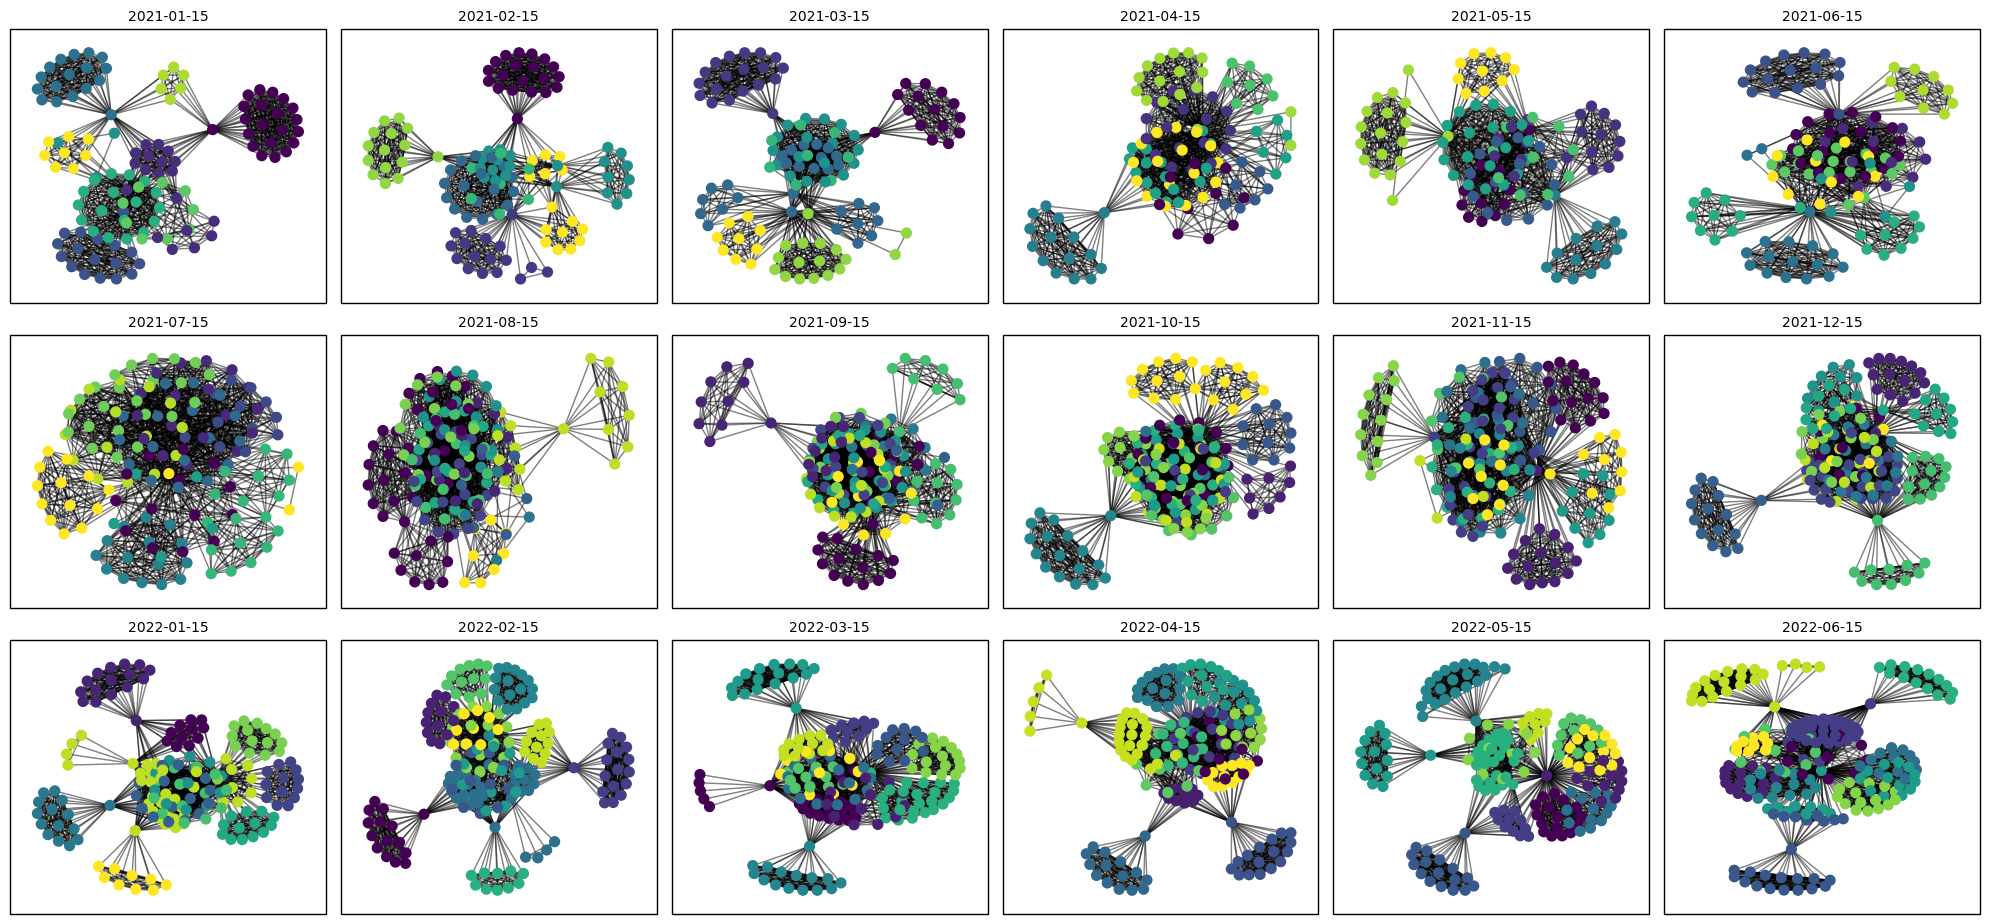

In [19]:
def visualize_wallet_network_grid(graphs, dates, output_directory, layout=nx.kamada_kawai_layout):
    # Define the grid size
    rows, cols = 3, 6  # Adjust based on the number of graphs
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily
    
    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        # Perform community detection
        partition = community_louvain.best_partition(graph)
        
        # Compute layout
        pos = layout(graph)  
        
        # Draw the graph with communities
        nx.draw_networkx_nodes(graph, pos, node_size=50, cmap=plt.get_cmap('viridis'),
                               node_color=list(partition.values()), ax=ax)
        nx.draw_networkx_edges(graph, pos, alpha=0.5, ax=ax)
        ax.set_title(dates[snapshot], fontsize=10)
        ax.set_axis_off()  # Hide axis for clarity
        
        # Draw a rectangle around the plot area
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    # Turn off any unused subplots
    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing to accommodate title if necessary
    plt.savefig(os.path.join(output_directory, 'wallet_network_grid.png'))
    plt.show()

# Visualize the wallet network grid
visualize_wallet_network_grid(graphs, dates, output_directory)

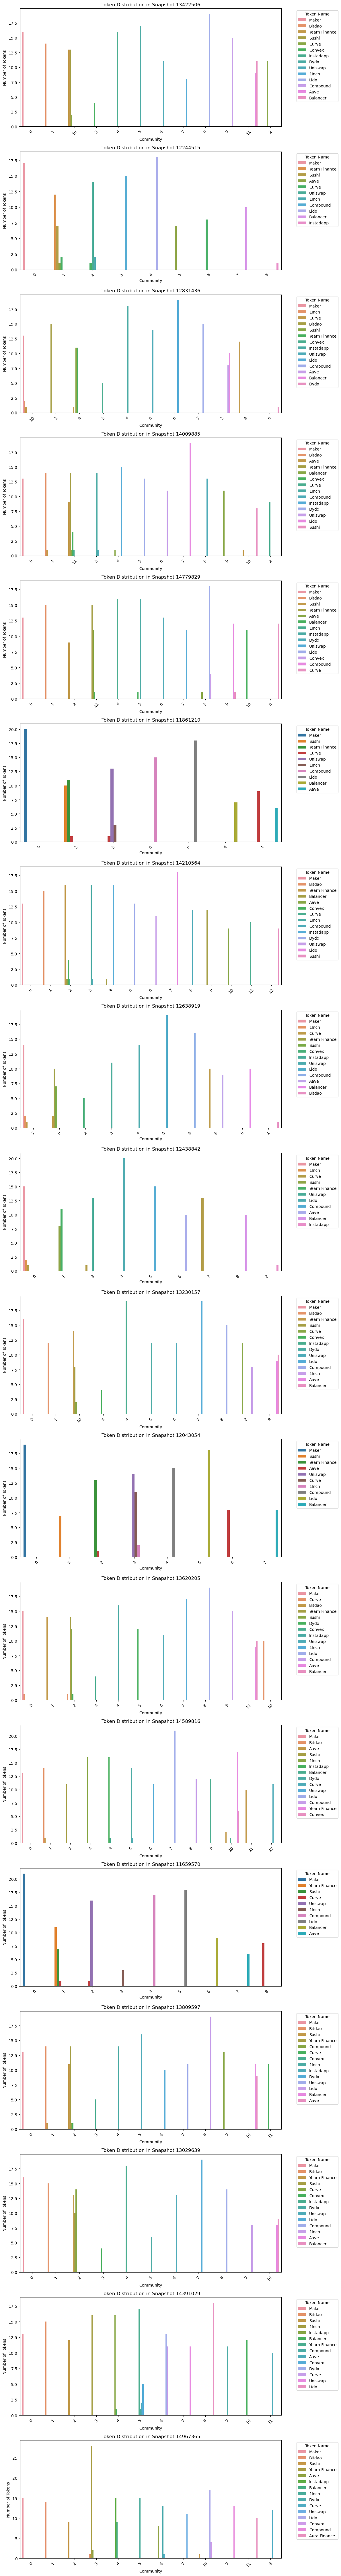

In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join

def generate_token_name_statistics(graph_directory, token_info_path):
    # Load the token mapping for reference
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address
    token_map = df_tokens.set_index('address')['name'].to_dict()

    community_token_stats = []

    # Process each graph file in the directory
    for filename in os.listdir(graph_directory):
        if filename.endswith('.graphml'):
            graph_path = join(graph_directory, filename)
            G = nx.read_graphml(graph_path)

            # Apply community detection
            partition = community_louvain.best_partition(G)
            nx.set_node_attributes(G, partition, 'community')

            # Compile token statistics per community
            community_stats = {}
            for node, data in G.nodes(data=True):
                community = data['community']
                token_address = data.get('token_address', '').lower()
                token_name = token_map.get(token_address, 'Unknown Token')

                if community not in community_stats:
                    community_stats[community] = {}
                if token_name not in community_stats[community]:
                    community_stats[community][token_name] = 0
                community_stats[community][token_name] += 1

            # Format data for this graph into a list of dictionaries
            snapshot_time = filename.replace('validated_wallet_projection_graph_', '').replace('.graphml', '')
            for community, tokens in community_stats.items():
                for token_name, count in tokens.items():
                    community_token_stats.append({
                        'Snapshot': snapshot_time,
                        'Community': community,
                        'Token Name': token_name,
                        'Count': count
                    })

    # Convert to DataFrame for better display and analysis
    return pd.DataFrame(community_token_stats)

def visualize_token_statistics_over_time(community_token_stats):
    # Ensure that the DataFrame has the correct data types
    community_token_stats['Count'] = community_token_stats['Count'].astype(int)
    community_token_stats['Community'] = community_token_stats['Community'].astype(str)

    # Set up the grid of plots, one per snapshot
    snapshots = community_token_stats['Snapshot'].unique()
    num_snapshots = len(snapshots)
    fig, axes = plt.subplots(num_snapshots, 1, figsize=(12, 5 * num_snapshots))

    if num_snapshots == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, snapshot in enumerate(snapshots):
        snapshot_data = community_token_stats[community_token_stats['Snapshot'] == snapshot]
        sns.barplot(data=snapshot_data, x='Community', y='Count', hue='Token Name', ax=axes[i])
        axes[i].set_title(f'Token Distribution in Snapshot {snapshot}')
        axes[i].set_xlabel('Community')
        axes[i].set_ylabel('Number of Tokens')
        axes[i].legend(title='Token Name', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Generate token name statistics
community_token_name_stats = generate_token_name_statistics(graph_directory, token_info_path)

# Visualize the token statistics over time
visualize_token_statistics_over_time(community_token_name_stats)


Input directory is set to: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Deskt

Loaded graph for snapshot 14589816
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14779829.graphml
Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365


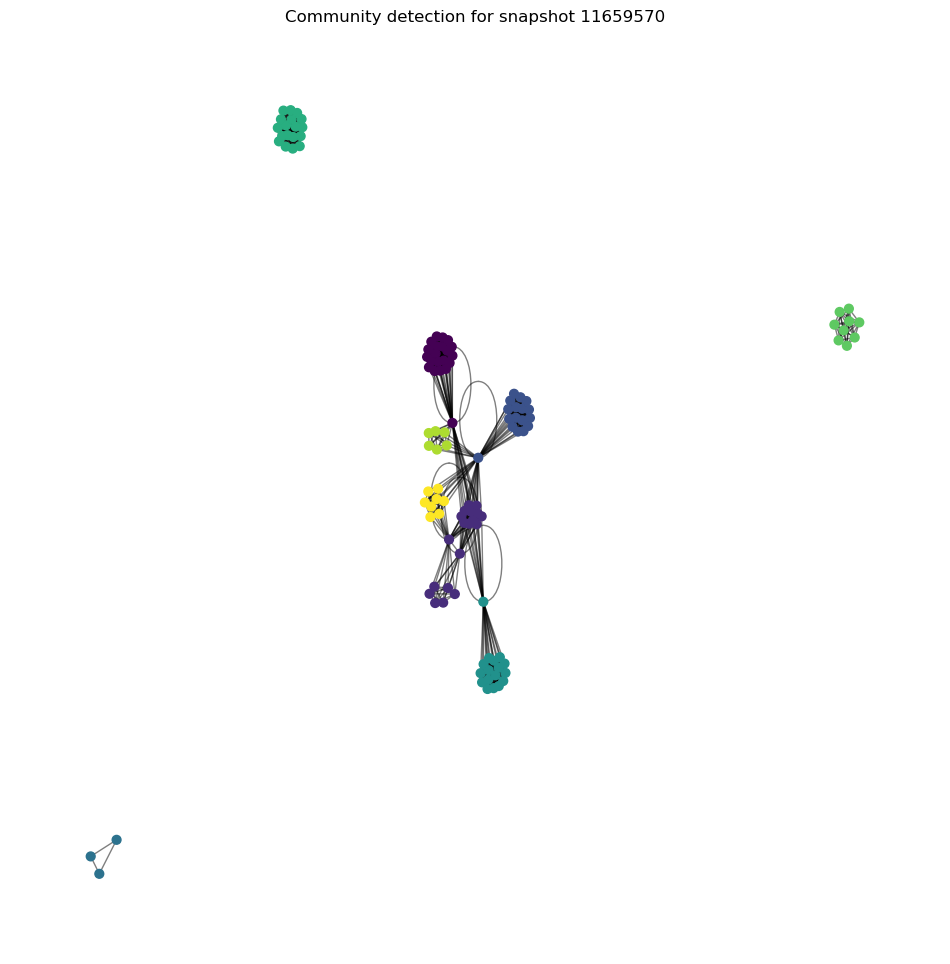

Snapshot: 11659570, Number of communities detected: 9


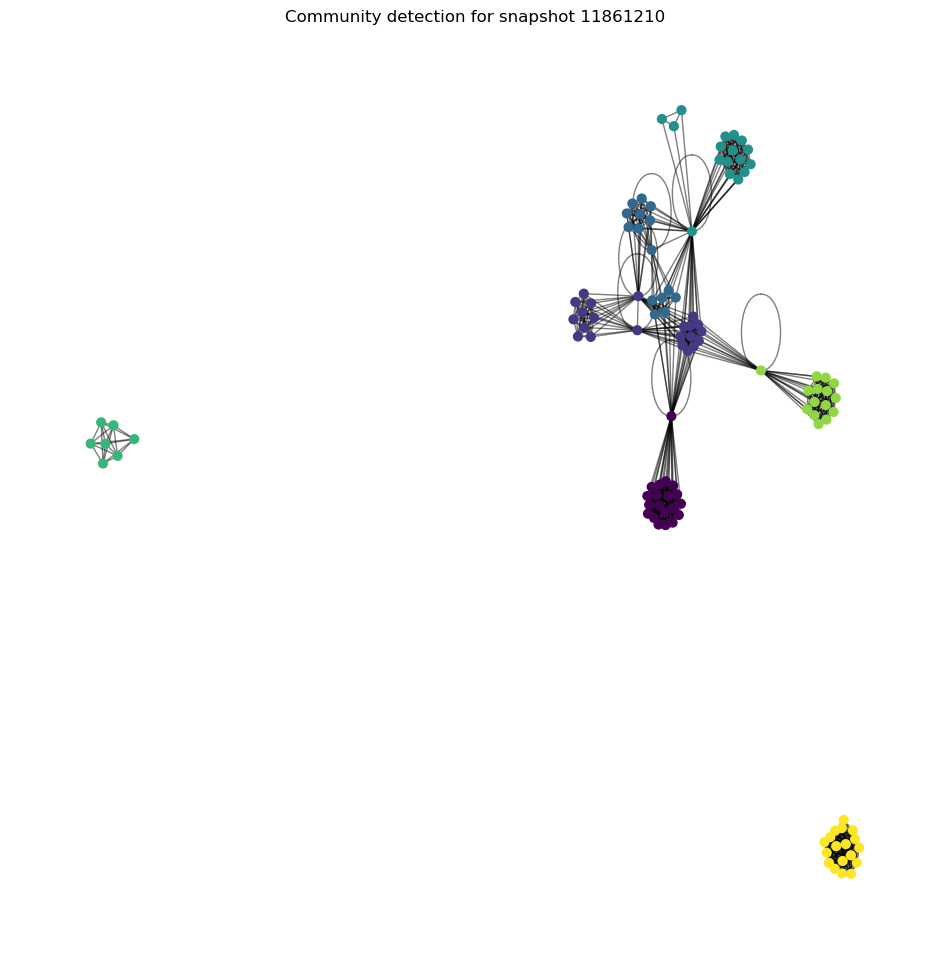

Snapshot: 11861210, Number of communities detected: 7


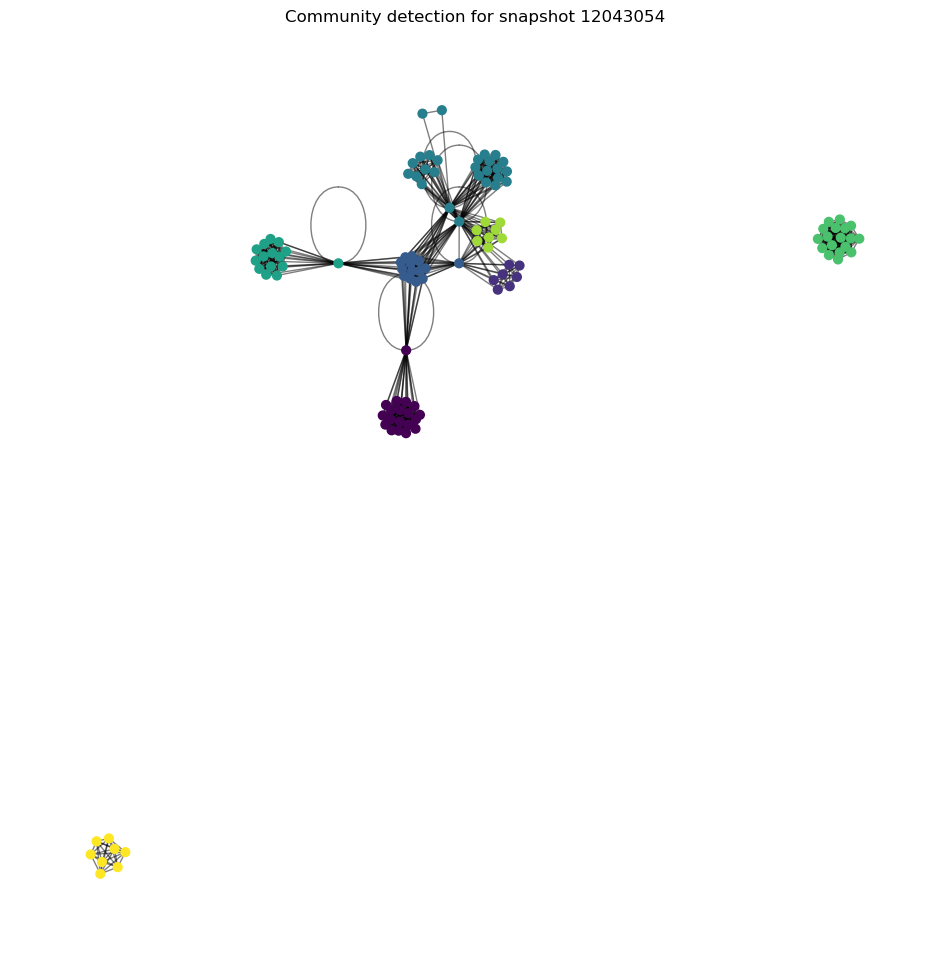

Snapshot: 12043054, Number of communities detected: 8


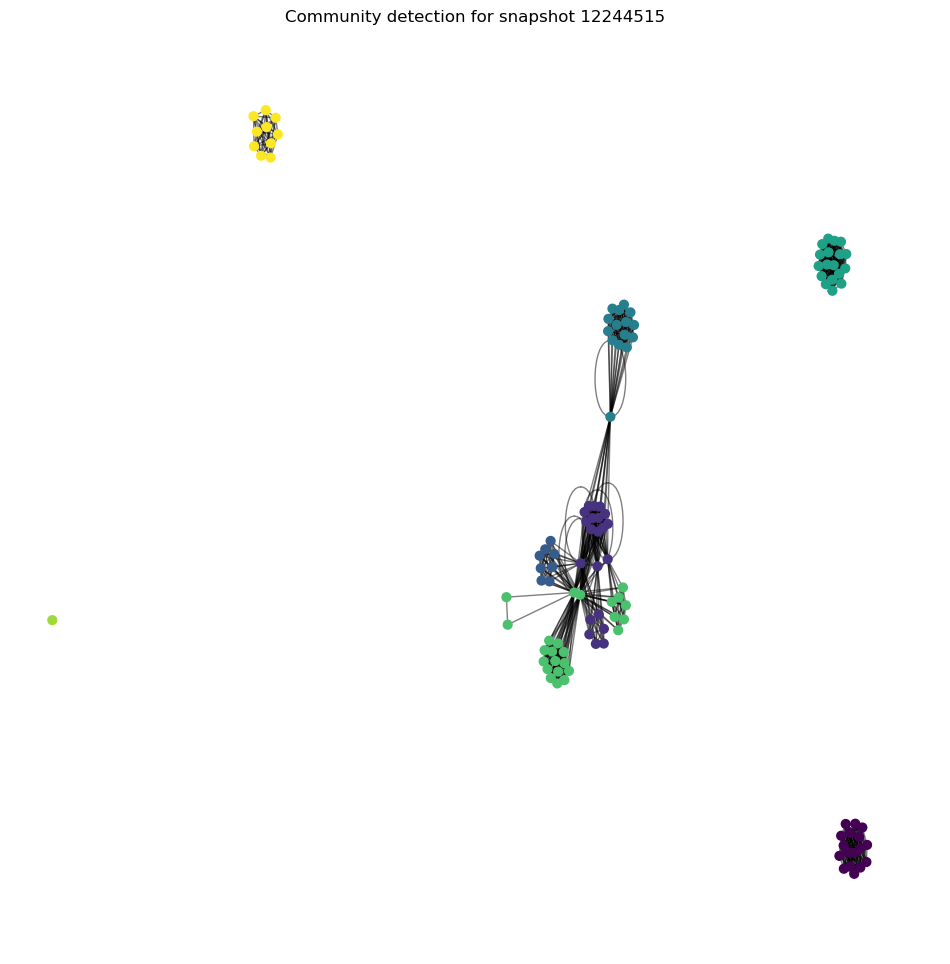

Snapshot: 12244515, Number of communities detected: 8


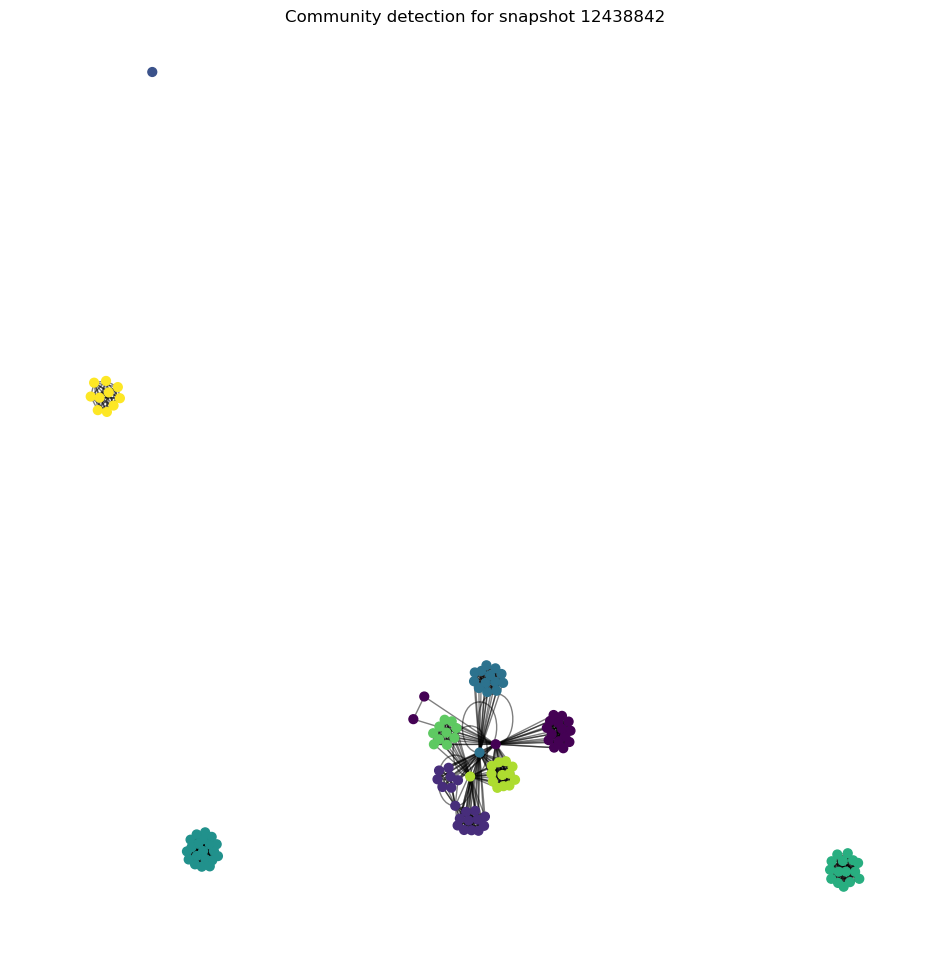

Snapshot: 12438842, Number of communities detected: 9


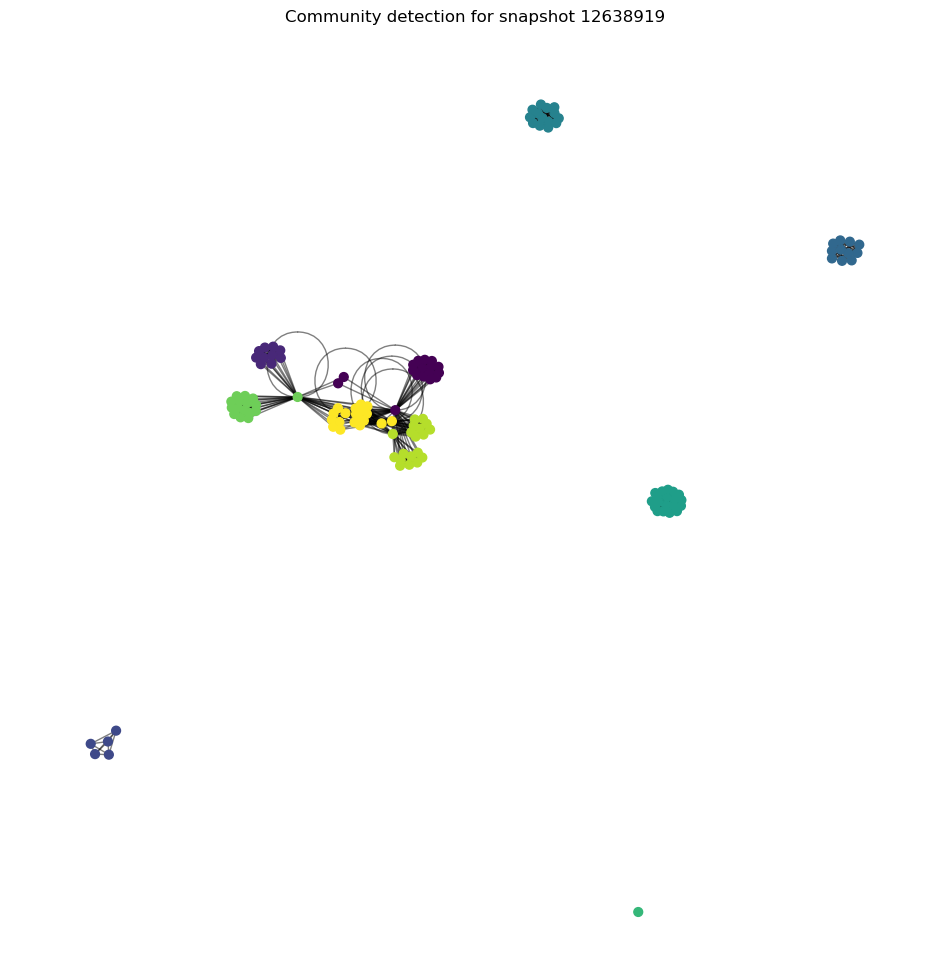

Snapshot: 12638919, Number of communities detected: 10


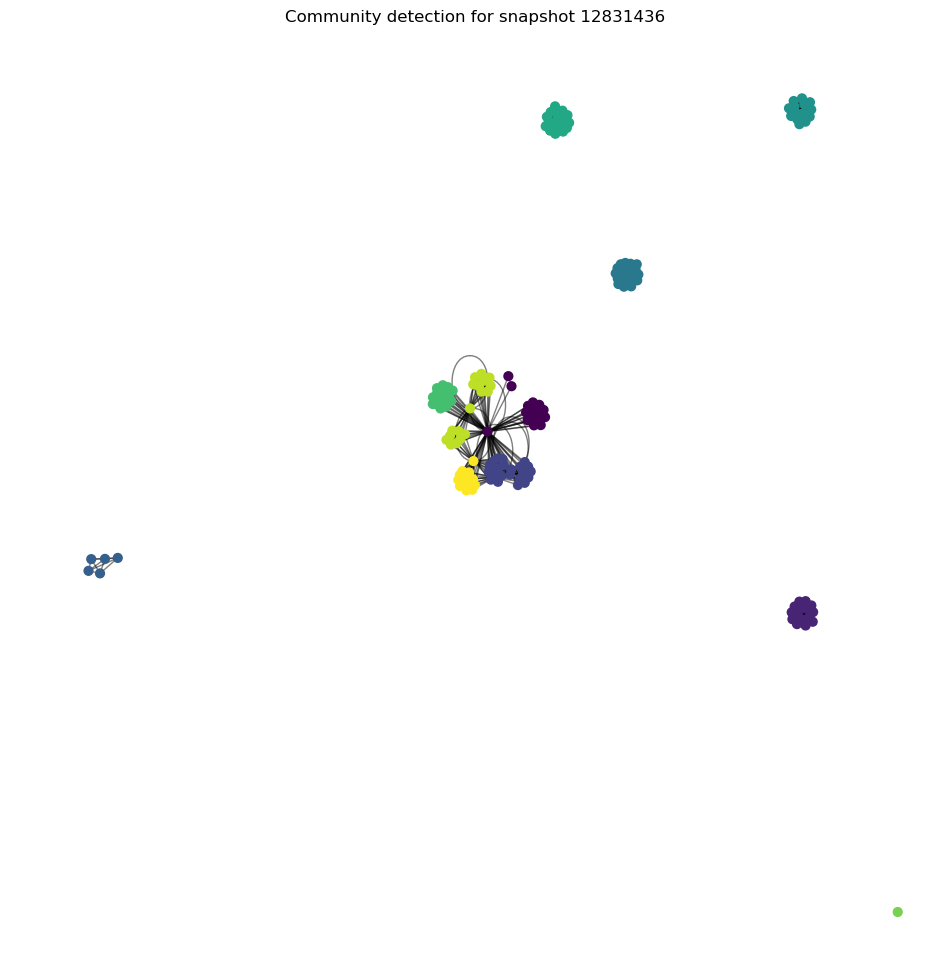

Snapshot: 12831436, Number of communities detected: 11


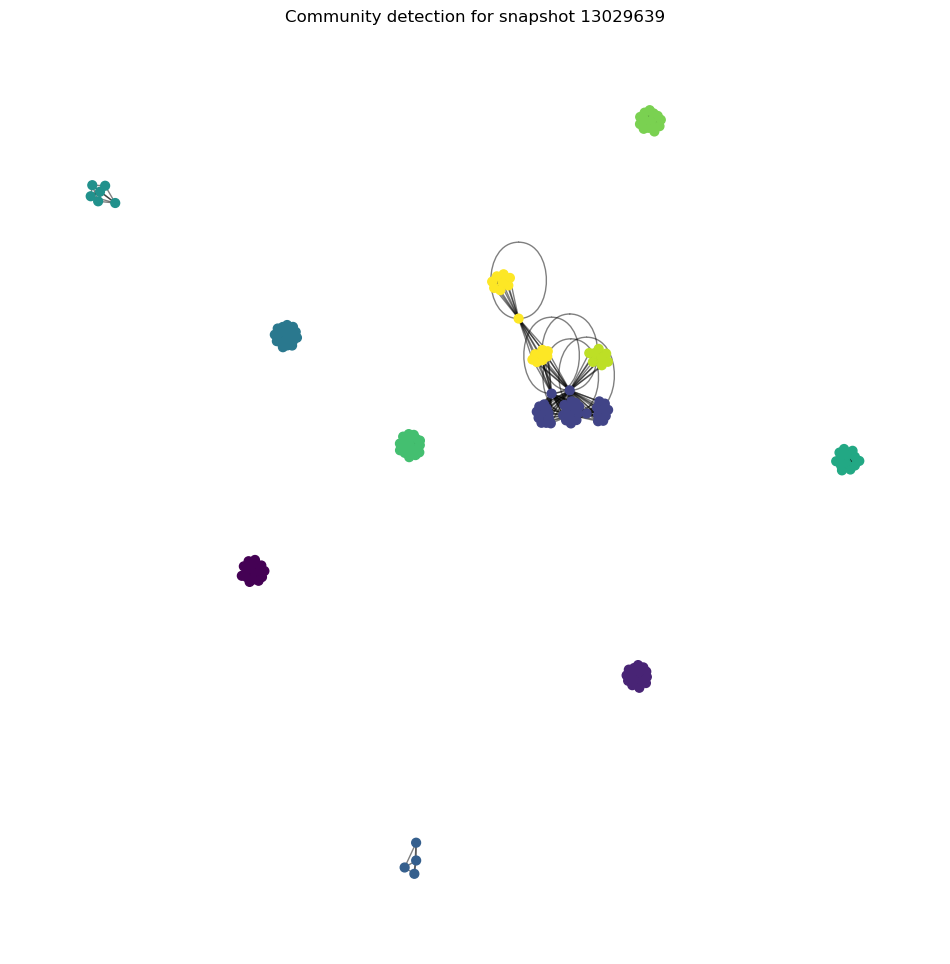

Snapshot: 13029639, Number of communities detected: 11


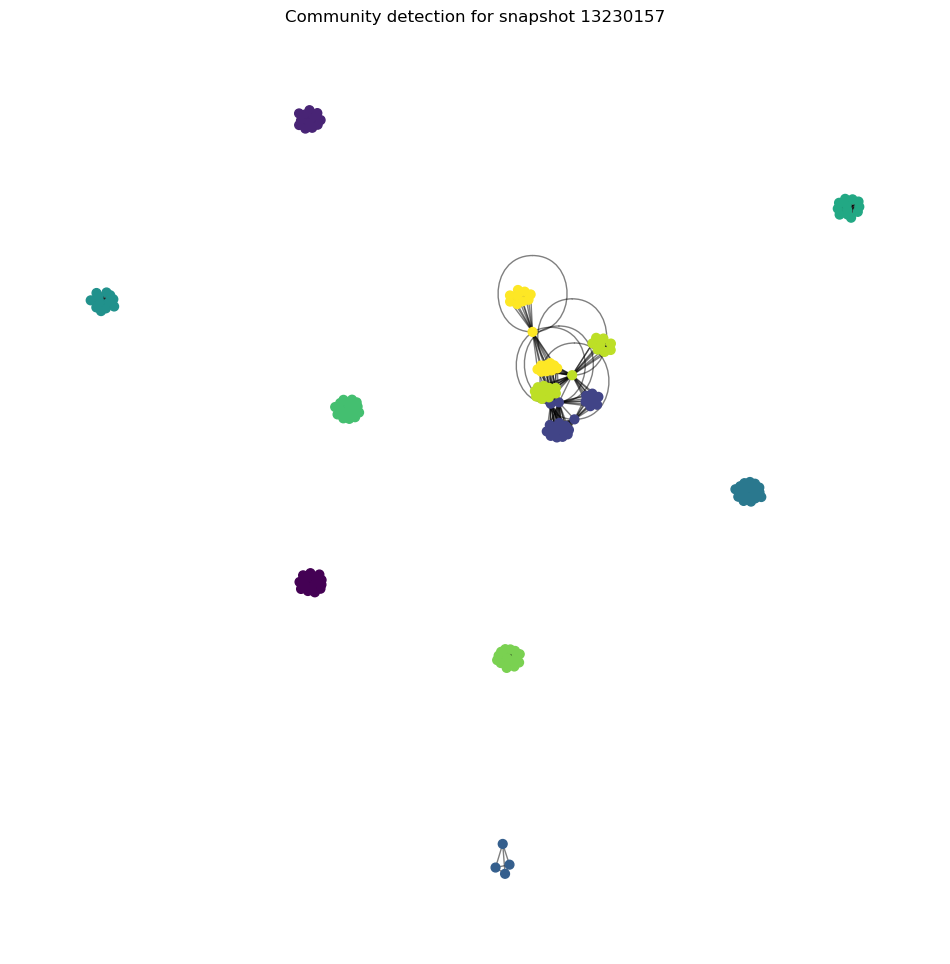

Snapshot: 13230157, Number of communities detected: 11


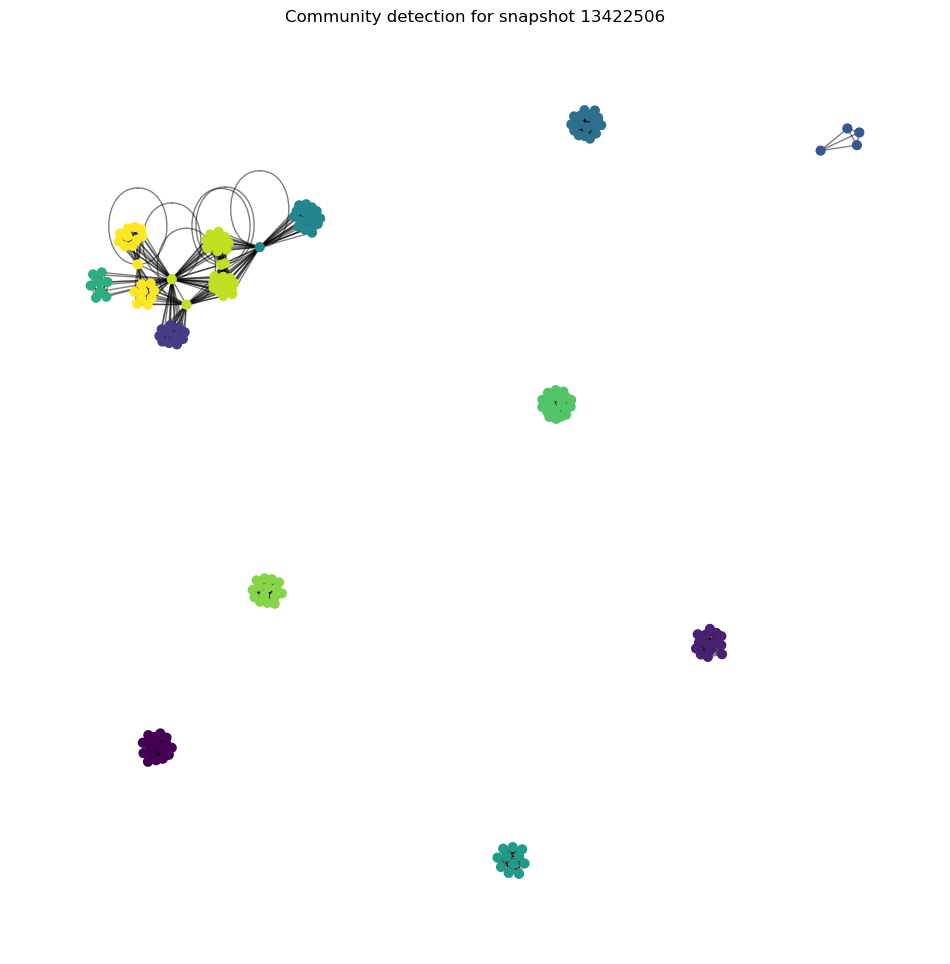

Snapshot: 13422506, Number of communities detected: 12


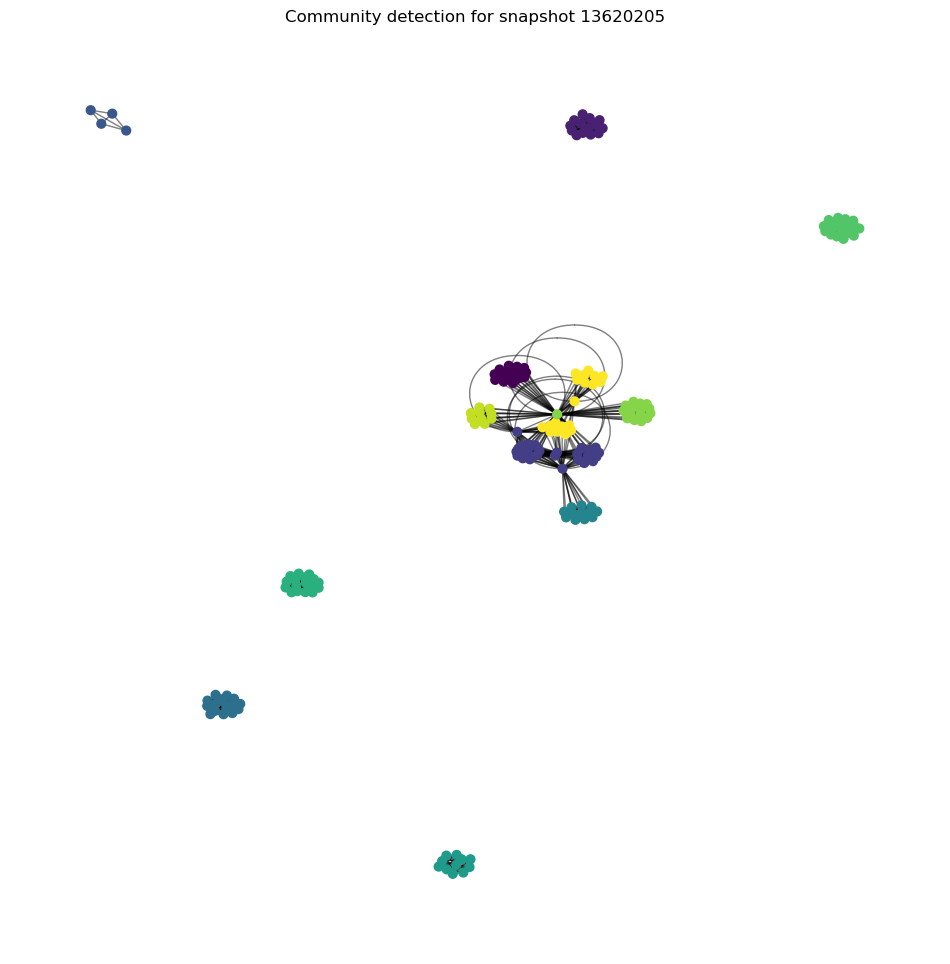

Snapshot: 13620205, Number of communities detected: 12


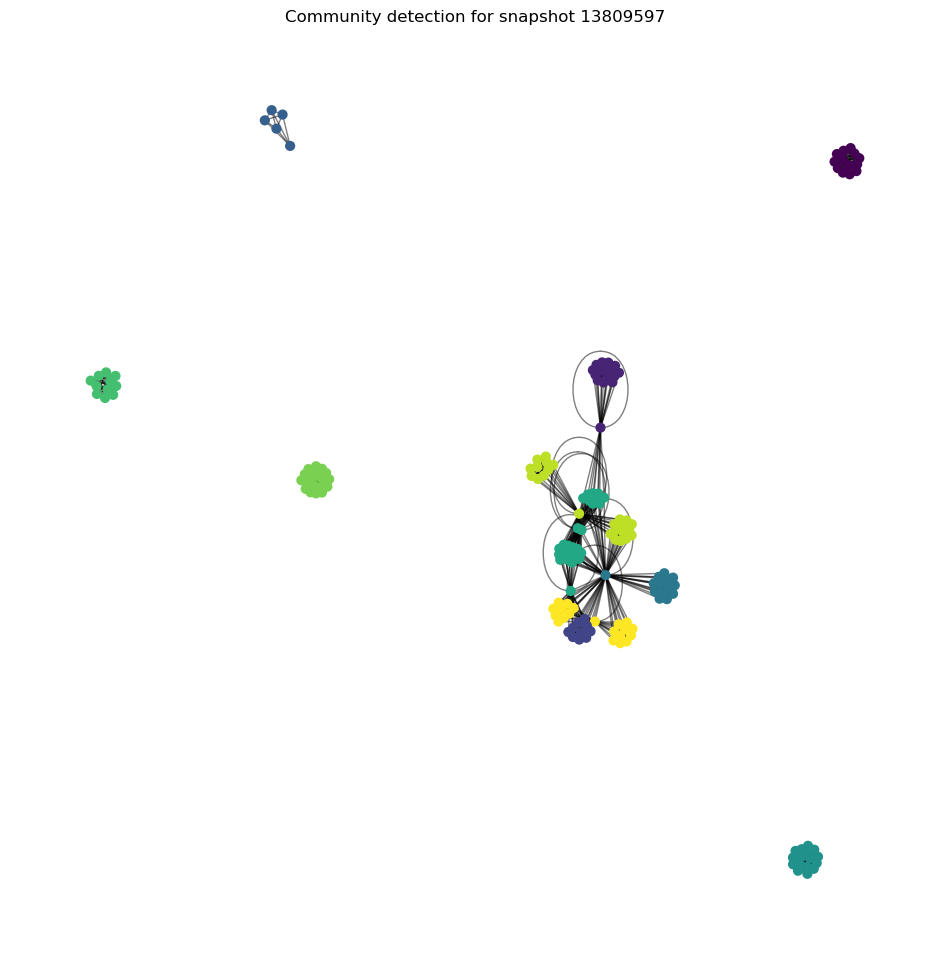

Snapshot: 13809597, Number of communities detected: 11


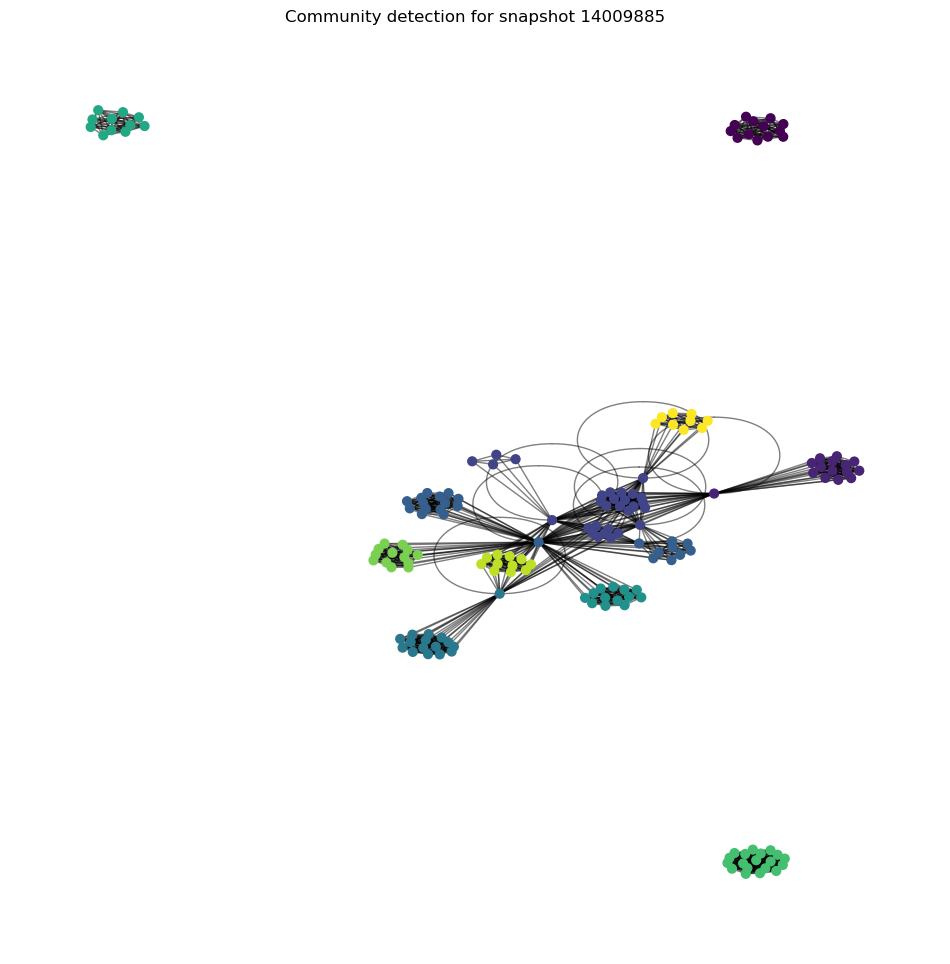

Snapshot: 14009885, Number of communities detected: 11


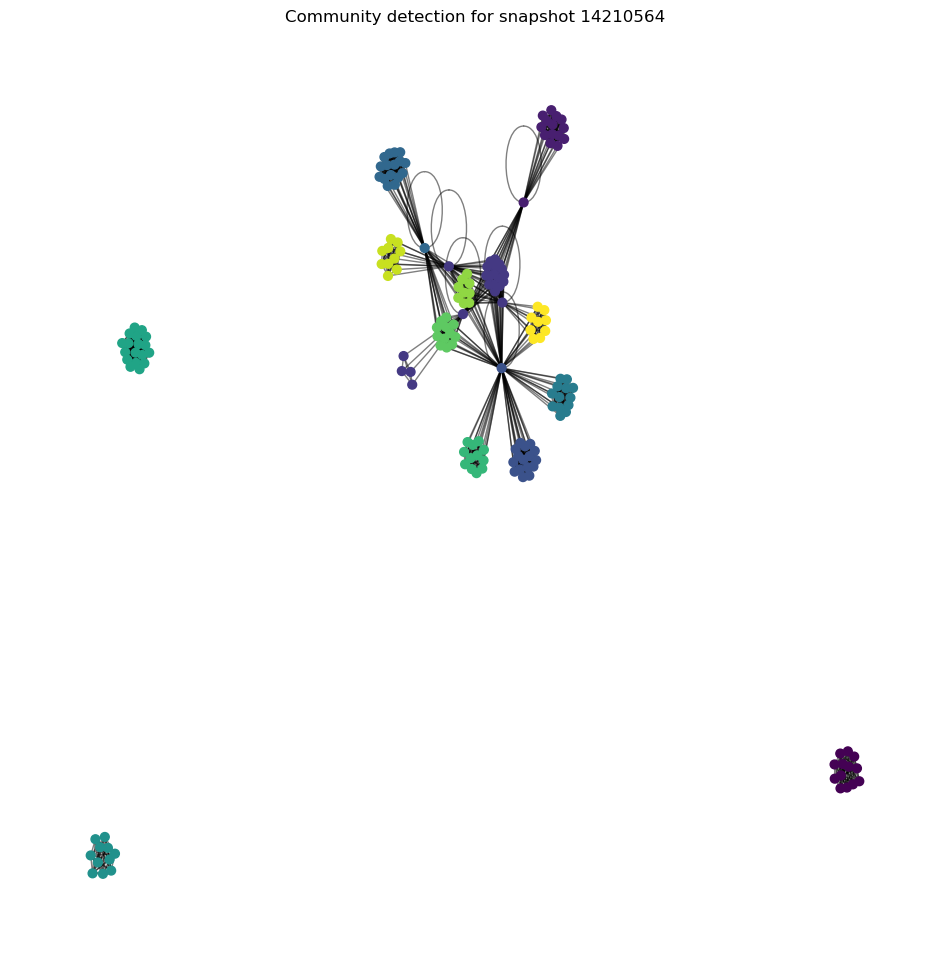

Snapshot: 14210564, Number of communities detected: 13


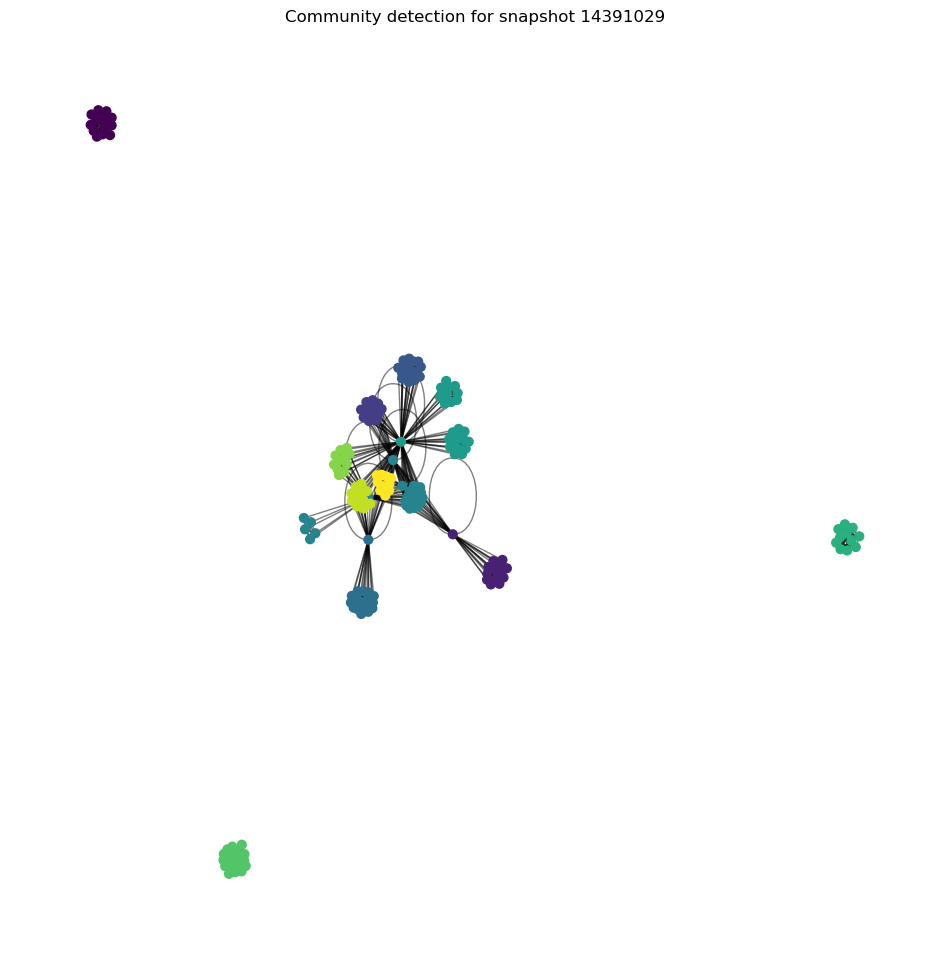

Snapshot: 14391029, Number of communities detected: 12


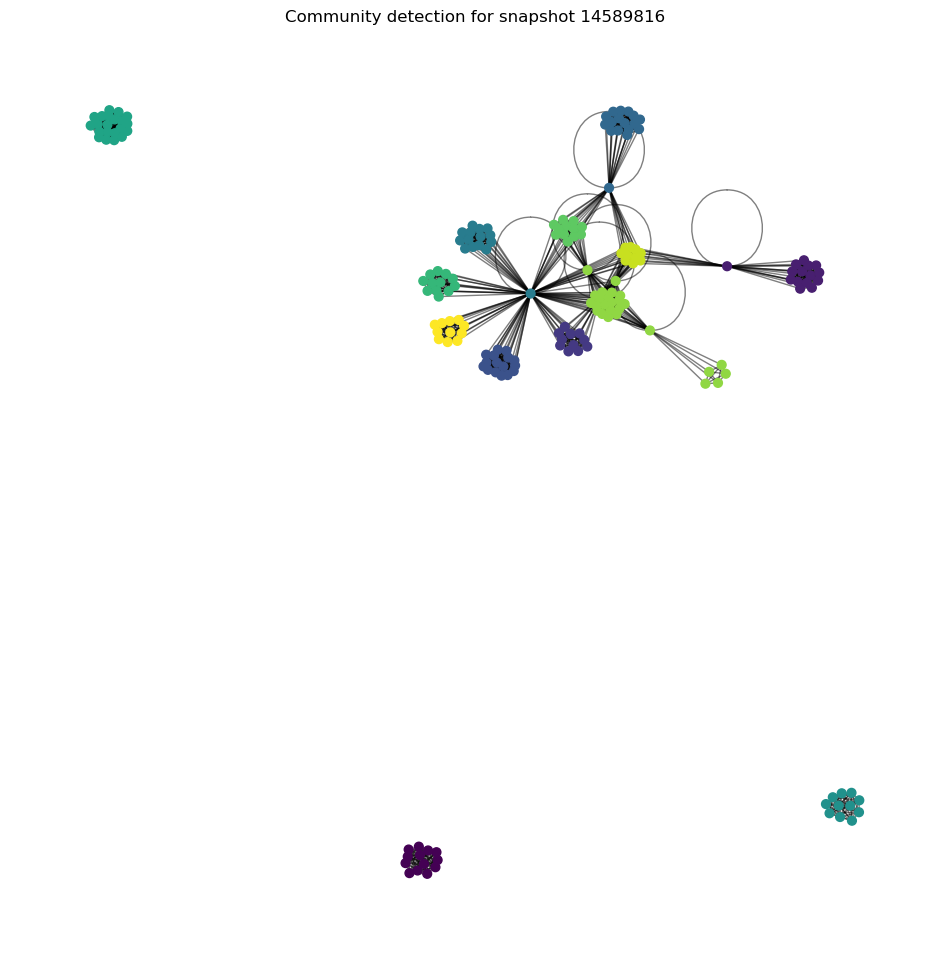

Snapshot: 14589816, Number of communities detected: 13


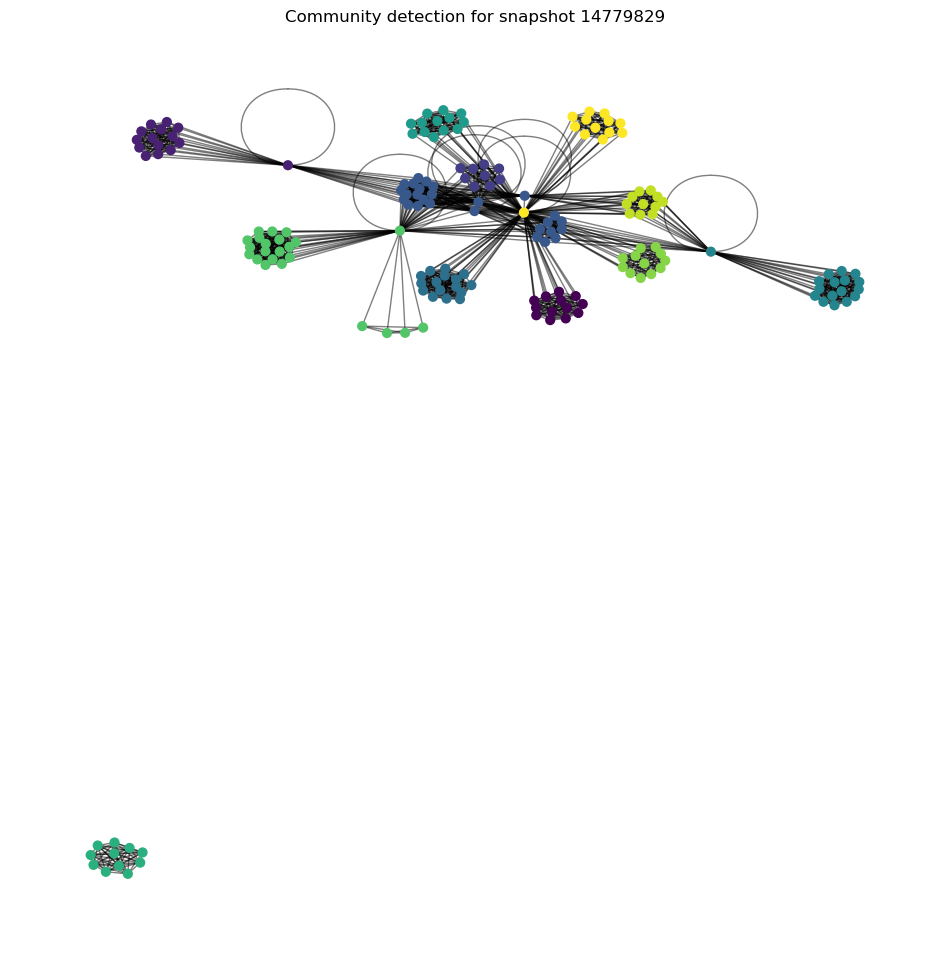

Snapshot: 14779829, Number of communities detected: 12


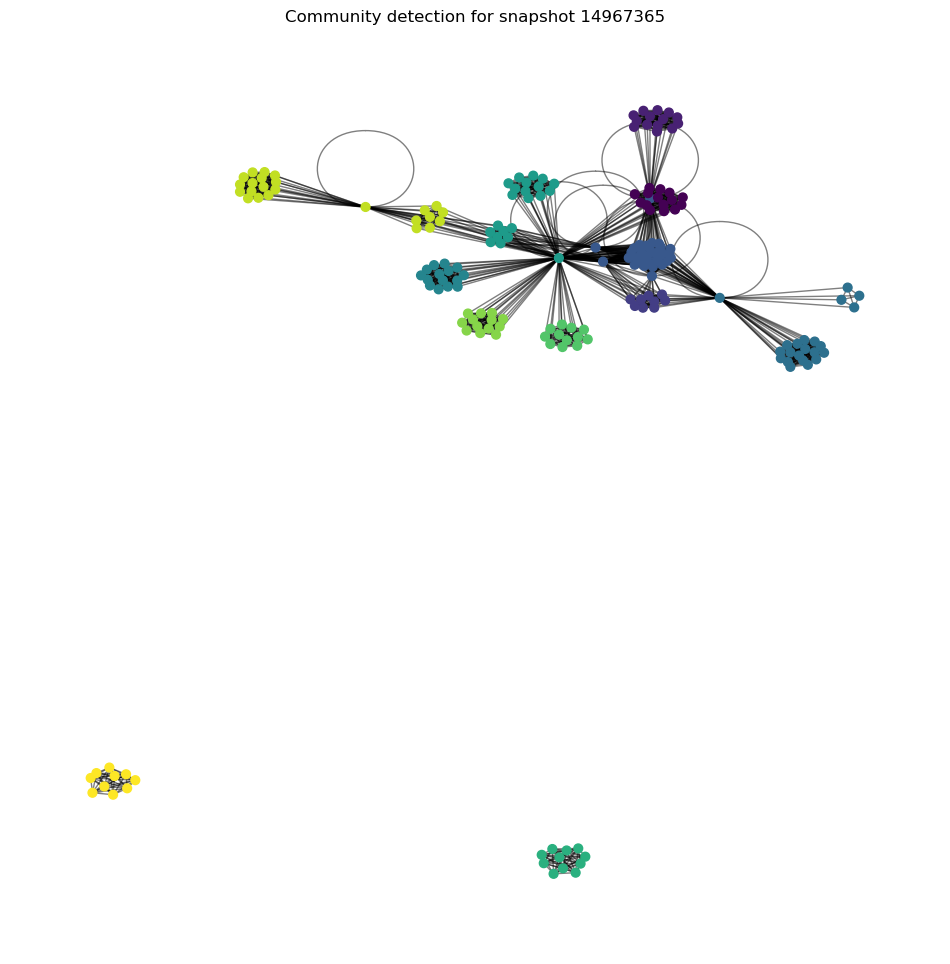

Snapshot: 14967365, Number of communities detected: 12


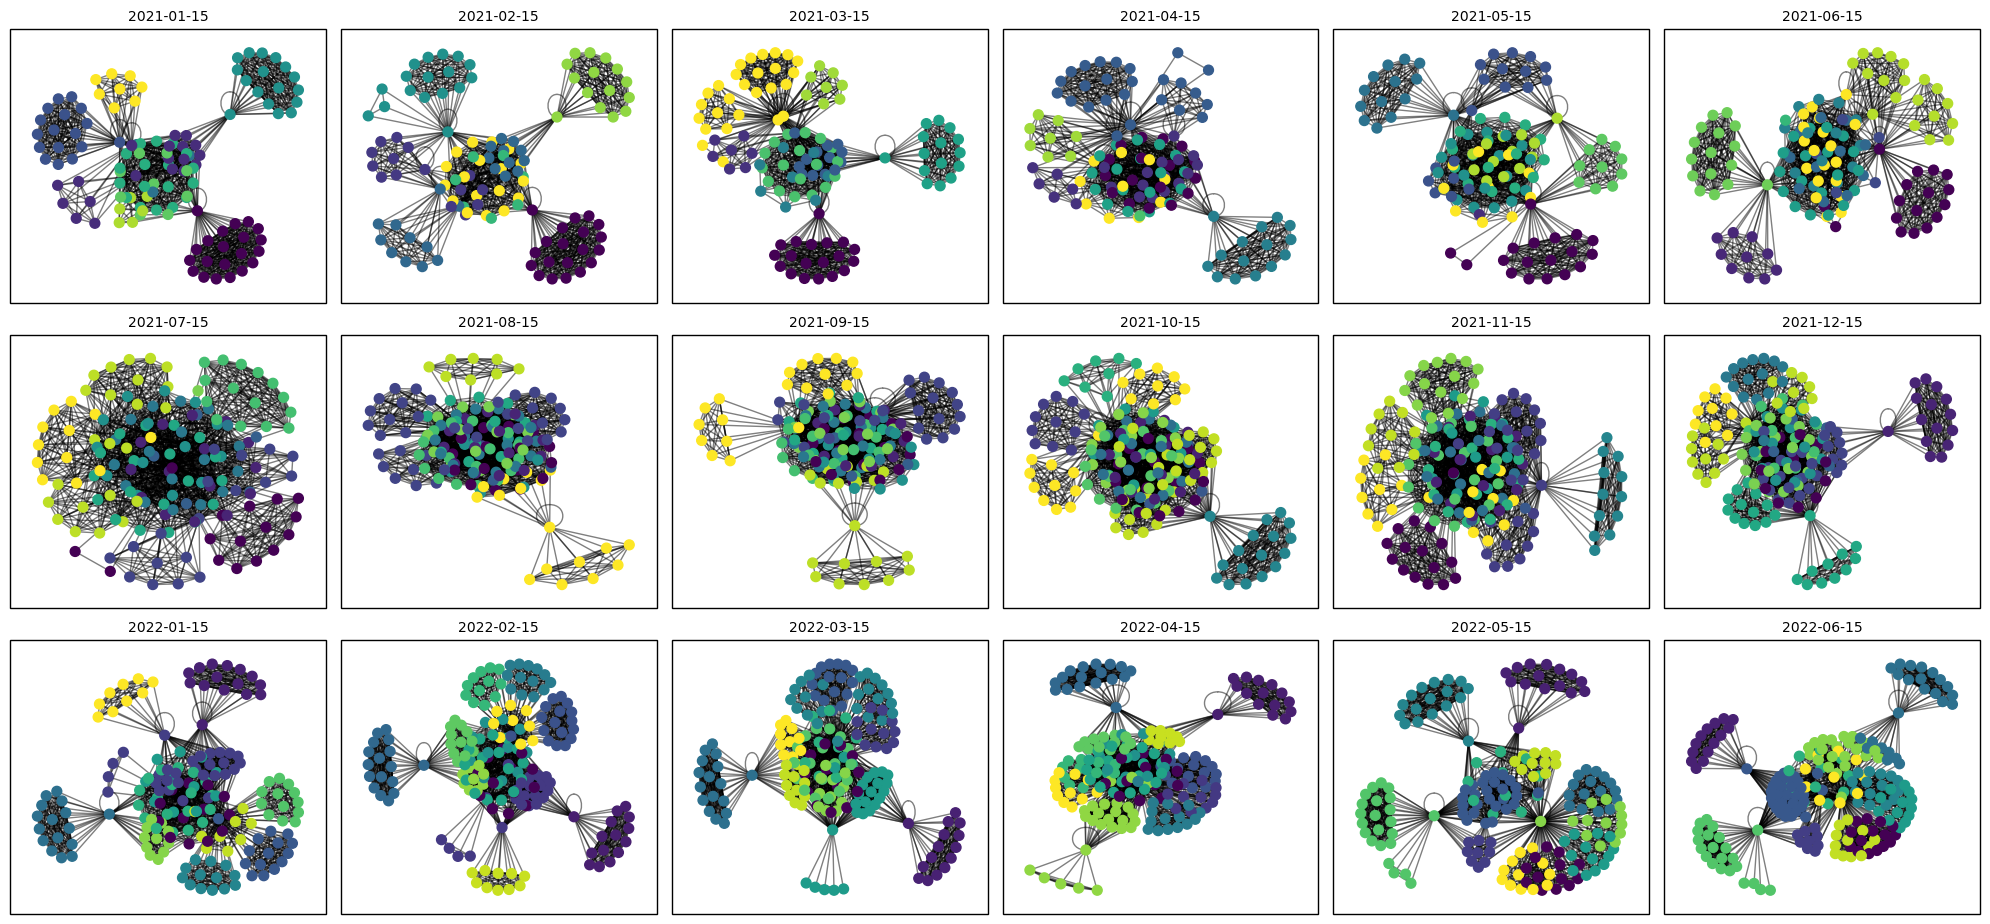

In [19]:
import os
import pandas as pd
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
from matplotlib import patches
from dotenv import load_dotenv

# Load environment variables from .env file (if needed for other variables)
load_dotenv()

# Set the input directory to the correct folder where the graphs are stored
input_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# Check if the input directory exists
if not os.path.exists(input_directory):
    raise FileNotFoundError(f"Input directory does not exist: {input_directory}")

print(f"Input directory is set to: {input_directory}")

# Function to load graphs from snapshots
def load_wallet_graphs_from_snapshots(df_snapshots, input_directory):
    graphs = {}
    dates = {}
    missing_snapshots = []
    
    for index, row in df_snapshots.iterrows():
        snapshot = row['Block Height']
        date = row['Date'].strftime('%Y-%m-%d')  # Format date as string
        dates[snapshot] = date
        file_path = os.path.join(input_directory, f"validated_wallet_projection_graph_{snapshot}.graphml")
        
        print(f"Checking file: {file_path}")  # Debug print

        if os.path.exists(file_path):
            graph = nx.read_graphml(file_path)
            graphs[snapshot] = graph
            print(f"Loaded graph for snapshot {snapshot}")
        else:
            print(f"Graph file for snapshot {snapshot} does not exist at {file_path}")
            missing_snapshots.append(snapshot)
    
    return graphs, dates, missing_snapshots

# Assuming df_snapshots is already loaded
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
df_snapshots = pd.read_csv(os.path.join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Load the graphs
graphs, dates, missing_snapshots = load_wallet_graphs_from_snapshots(df_snapshots, input_directory)

# Function to perform community detection and visualize results
def detect_and_visualize_communities(graph, snapshot, output_directory):
    # Compute the best partition using the Louvain method
    partition = community_louvain.best_partition(graph)
    
    # Draw the graph with communities
    pos = nx.spring_layout(graph)
    cmap = plt.get_cmap('viridis')
    plt.figure(figsize=(12, 12))
    
    # Draw nodes with community colors
    nx.draw_networkx_nodes(graph, pos, partition.keys(), node_size=40, 
                           cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    
    plt.title(f"Community detection for snapshot {snapshot}")
    plt.axis('off')
    plt.savefig(os.path.join(output_directory, f'community_snapshot_{snapshot}.png'))
    plt.show()
    
    return partition

# Directory to save community detection visualizations
output_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/output'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Perform community detection on loaded graphs
for snapshot, graph in graphs.items():
    partition = detect_and_visualize_communities(graph, snapshot, output_directory)
    
    # Analyze the partition
    num_communities = len(set(partition.values()))
    print(f"Snapshot: {snapshot}, Number of communities detected: {num_communities}")
    
    # Example: Save partition information
    partition_df = pd.DataFrame(list(partition.items()), columns=['Node', 'Community'])
    partition_df.to_csv(os.path.join(output_directory, f'partition_snapshot_{snapshot}.csv'), index=False)

def visualize_wallet_network_grid(graphs, dates, output_directory, layout=nx.kamada_kawai_layout):
    # Define the grid size
    rows, cols = 3, 6  # Adjust based on the number of graphs
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.flatten()  # Flatten to iterate easily
    
    for ax, (snapshot, graph) in zip(axes, graphs.items()):
        # Perform community detection
        partition = community_louvain.best_partition(graph)
        
        # Compute layout
        pos = layout(graph)  
        
        # Draw the graph with communities
        nx.draw_networkx_nodes(graph, pos, node_size=50, cmap=plt.get_cmap('viridis'),
                               node_color=list(partition.values()), ax=ax)
        nx.draw_networkx_edges(graph, pos, alpha=0.5, ax=ax)
        ax.set_title(dates[snapshot], fontsize=10)
        ax.set_axis_off()  # Hide axis for clarity
        
        # Draw a rectangle around the plot area
        rect = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='black', facecolor='none', transform=ax.transAxes, clip_on=False)
        ax.add_patch(rect)

    # Turn off any unused subplots
    for i in range(len(graphs), len(axes)):
        axes[i].set_axis_off()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the top spacing to accommodate title if necessary
    plt.savefig(os.path.join(output_directory, 'wallet_network_grid.png'))
    plt.show()

# Visualize the wallet network grid
visualize_wallet_network_grid(graphs, dates, output_directory)


In [22]:
import os
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join

def match_communities(prev_partition, current_partition):
    """
    Match communities from the previous snapshot to the current snapshot based on node overlap.
    """
    match_map = {}
    for curr_comm, curr_nodes in current_partition.items():
        best_match = None
        max_overlap = 0
        for prev_comm, prev_nodes in prev_partition.items():
            overlap = len(set(curr_nodes) & set(prev_nodes))
            if overlap > max_overlap:
                best_match = prev_comm
                max_overlap = overlap
        if best_match is not None:
            match_map[curr_comm] = best_match
    return match_map

def detect_communities_over_time(graphs):
    community_tracking = []
    prev_partition = None

    for snapshot, graph in sorted(graphs.items()):
        # Detect communities in the current snapshot
        partition = community_louvain.best_partition(graph)

        # Organize nodes by their community
        current_partition = {}
        for node, comm in partition.items():
            if comm not in current_partition:
                current_partition[comm] = []
            current_partition[comm].append(node)

        if prev_partition is not None:
            # Match current communities to previous ones
            match_map = match_communities(prev_partition, current_partition)
            matched_partition = {node: match_map.get(comm, comm) for node, comm in partition.items()}
        else:
            matched_partition = partition
        
        prev_partition = current_partition
        
        # Store the results for analysis
        community_tracking.append({
            'Snapshot': snapshot,
            'Partition': matched_partition,
        })
    
    return community_tracking

def analyze_community_changes(community_tracking):
    changes = []

    for i in range(1, len(community_tracking)):
        prev_snapshot = community_tracking[i-1]['Snapshot']
        current_snapshot = community_tracking[i]['Snapshot']
        prev_partition = community_tracking[i-1]['Partition']
        current_partition = community_tracking[i]['Partition']

        prev_communities = set(prev_partition.values())
        current_communities = set(current_partition.values())

        # Detect splits
        for comm in prev_communities:
            nodes_in_comm = {node for node, comm_id in prev_partition.items() if comm_id == comm}
            overlap_communities = [c for c in current_communities if len(nodes_in_comm & {node for node, comm_id in current_partition.items() if comm_id == c}) > 0]
            if len(overlap_communities) > 1:
                changes.append({
                    'Type': 'Split',
                    'Original Community': comm,
                    'New Communities': overlap_communities,
                    'Snapshot': current_snapshot
                })

        # Detect merges
        for comm in current_communities:
            nodes_in_comm = {node for node, comm_id in current_partition.items() if comm_id == comm}
            overlap_communities = [c for c in prev_communities if len(nodes_in_comm & {node for node, comm_id in prev_partition.items() if comm_id == c}) > 0]
            if len(overlap_communities) > 1:
                changes.append({
                    'Type': 'Merge',
                    'Original Communities': overlap_communities,
                    'New Community': comm,
                    'Snapshot': current_snapshot
                })

        # Detect stable communities
        for comm in current_communities:
            nodes_in_comm = {node for node, comm_id in current_partition.items() if comm_id == comm}
            prev_comm = next((c for c in prev_communities if len(nodes_in_comm & {node for node, comm_id in prev_partition.items() if comm_id == c}) > 0), None)
            if prev_comm and prev_comm == comm:
                changes.append({
                    'Type': 'Stable',
                    'Community': comm,
                    'Snapshot': current_snapshot
                })

    return pd.DataFrame(changes)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
df_snapshots = pd.read_csv(join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])

# Load the graphs
graphs, dates, missing_snapshots = load_wallet_graphs_from_snapshots(df_snapshots, graph_directory)

# Detect communities over time
community_tracking = detect_communities_over_time(graphs)

# Analyze community changes
community_changes = analyze_community_changes(community_tracking)
print(community_changes)


Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8354625.gra

Loaded graph for snapshot 14210564
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14391029.graphml
Loaded graph for snapshot 14391029
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14589816.graphml
Loaded graph for snapshot 14589816
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14779829.graphml
Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365
       Type  Original Community New Communities  Snapshot  \
0     Split                 1.0          [1, 8]  11861210   
1     Merge                 NaN             NaN  11861210   
2     Merge                 NaN       

In [23]:
import pandas as pd
import plotly.graph_objects as go

def prepare_sankey_data(community_changes):
    """
    Prepare data for a Sankey diagram based on community changes.
    """
    labels = []
    source = []
    target = []
    value = []

    community_index = {}

    def add_label(label):
        if label not in community_index:
            community_index[label] = len(labels)
            labels.append(label)
        return community_index[label]

    for _, row in community_changes.iterrows():
        if row['Type'] == 'Split':
            original_label = f"Comm {row['Original Community']} ({row['Snapshot'] - 1})"
            for new_comm in row['New Communities']:
                new_label = f"Comm {new_comm} ({row['Snapshot']})"
                source.append(add_label(original_label))
                target.append(add_label(new_label))
                value.append(1)
        elif row['Type'] == 'Merge':
            new_label = f"Comm {row['New Community']} ({row['Snapshot']})"
            for original_comm in row['Original Communities']:
                original_label = f"Comm {original_comm} ({row['Snapshot'] - 1})"
                source.append(add_label(original_label))
                target.append(add_label(new_label))
                value.append(1)
        elif row['Type'] == 'Stable':
            label = f"Comm {row['Community']} ({row['Snapshot'] - 1})"
            source.append(add_label(label))
            target.append(add_label(f"Comm {row['Community']} ({row['Snapshot']})"))
            value.append(1)

    return labels, source, target, value

def visualize_community_changes_sankey(community_changes):
    labels, source, target, value = prepare_sankey_data(community_changes)

    # Create the Sankey diagram
    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=source,
            target=target,
            value=value
        )
    ))

    fig.update_layout(title_text="Community Changes Over Time", font_size=10)
    fig.show()

# Assuming community_changes DataFrame is available
visualize_community_changes_sankey(community_changes)


In [24]:
import os
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join

def community_statistics_per_snapshot(graphs):
    community_stats = []

    for snapshot, graph in sorted(graphs.items()):
        # Detect communities in the current snapshot
        partition = community_louvain.best_partition(graph)

        # Compute statistics
        community_sizes = pd.Series(list(partition.values())).value_counts()
        num_communities = len(community_sizes)
        largest_community = community_sizes.max()
        smallest_community = community_sizes.min()
        total_nodes = graph.number_of_nodes()

        # Compile the statistics
        community_stats.append({
            'Snapshot': snapshot,
            'Num Communities': num_communities,
            'Largest Community Size': largest_community,
            'Smallest Community Size': smallest_community,
            'Total Nodes': total_nodes,
            'Community Size Distribution': community_sizes.to_dict()
        })

    return pd.DataFrame(community_stats)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
df_snapshots = pd.read_csv(join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])

# Load the graphs
graphs, dates, missing_snapshots = load_wallet_graphs_from_snapshots(df_snapshots, graph_directory)

# Generate community statistics for each snapshot
community_stats_df = community_statistics_per_snapshot(graphs)

# Display the statistics
print(community_stats_df)


Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_7962629.graphml
Graph file for snapshot 7962629 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_7962629.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8155117.graphml
Graph file for snapshot 8155117 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8155117.graphml
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8354625.graphml
Graph file for snapshot 8354625 does not exist at /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_8354625.gra

Loaded graph for snapshot 14589816
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14779829.graphml
Loaded graph for snapshot 14779829
Checking file: /Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched/validated_wallet_projection_graph_14967365.graphml
Loaded graph for snapshot 14967365
    Snapshot  Num Communities  Largest Community Size  \
0   11659570                9                      21   
1   11861210                7                      22   
2   12043054                8                      27   
3   12244515                8                      26   
4   12438842                9                      20   
5   12638919               10                      19   
6   12831436               11                      23   
7   13029639               11                      37   
8   13230157               11                      24   
9   13422506           

In [25]:
import os
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join

# Load the token info CSV
def load_token_info(token_info_path):
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address case
    token_map = df_tokens.set_index('address')['name'].to_dict()
    return token_map

def analyze_tokens_per_community(graph, token_map):
    # Detect communities
    partition = community_louvain.best_partition(graph)

    # Create a DataFrame to store wallet to community mappings
    community_df = pd.DataFrame(list(partition.items()), columns=['Wallet', 'Community'])
    
    # Initialize a dictionary to aggregate token holdings per community
    community_tokens = {}

    # Iterate through each node in the graph
    for wallet in graph.nodes():
        community = partition[wallet]
        token_address = graph.nodes[wallet].get('token_address', '').lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        
        if community not in community_tokens:
            community_tokens[community] = {}
        if token_name not in community_tokens[community]:
            community_tokens[community][token_name] = 0
        
        # Aggregate token holdings (assuming each wallet holds 1 unit of each token for simplicity)
        community_tokens[community][token_name] += 1

    return community_tokens

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Load token information
token_map = load_token_info(token_info_path)

# Load the specific graph for snapshot 11659570
snapshot = 11659570
graph_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
graph = nx.read_graphml(graph_path)

# Analyze the tokens held in each community
community_tokens = analyze_tokens_per_community(graph, token_map)

# Convert the results to a DataFrame for better display
community_tokens_df = pd.DataFrame([
    {'Community': community, 'Token': token, 'Count': count}
    for community, tokens in community_tokens.items()
    for token, count in tokens.items()
])

# Display the results
print(community_tokens_df)


    Community          Token  Count
0           0          Maker     21
1           1  Yearn Finance     11
2           1          Sushi      7
3           1          Curve      1
4           2        Uniswap     16
5           2          Curve      1
6           3          1Inch      3
7           4       Compound     17
8           5           Lido     18
9           6       Balancer      9
10          7           Aave      6
11          8          Curve      8


In [26]:
import os
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join

# Load the token info CSV
def load_token_info(token_info_path):
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address case
    token_map = df_tokens.set_index('address')['name'].to_dict()
    return token_map

def analyze_tokens_per_community(graph, token_map):
    # Detect communities
    partition = community_louvain.best_partition(graph)

    # Initialize a dictionary to aggregate token holdings per community
    community_tokens = {}

    # Iterate through each node (wallet) in the graph
    for wallet in graph.nodes():
        community = partition[wallet]
        token_address = graph.nodes[wallet].get('token_address', '').lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        
        if community not in community_tokens:
            community_tokens[community] = {}
        if token_name not in community_tokens[community]:
            community_tokens[community][token_name] = 0
        
        # Aggregate token holdings (assuming each wallet holds 1 unit of each token for simplicity)
        community_tokens[community][token_name] += 1

    return community_tokens

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Load token information
token_map = load_token_info(token_info_path)

# Load the specific graph for snapshot 11659570
snapshot = 11659570
graph_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
graph = nx.read_graphml(graph_path)

# Analyze the tokens held in each community
community_tokens = analyze_tokens_per_community(graph, token_map)

# Convert the results to a DataFrame for better display
community_tokens_df = pd.DataFrame([
    {'Community': community, 'Token': token, 'Count': count}
    for community, tokens in community_tokens.items()
    for token, count in tokens.items()
])

# Display the results
print(community_tokens_df)


    Community          Token  Count
0           0          Maker     21
1           1  Yearn Finance     11
2           1          Sushi      7
3           1          Curve      1
4           2        Uniswap     16
5           2          Curve      1
6           3          1Inch      3
7           4       Compound     17
8           5           Lido     18
9           6       Balancer      9
10          7           Aave      6
11          8          Curve      8


In [27]:
import os
import pandas as pd
import networkx as nx
import community as community_louvain
from os.path import join

# Load the token info CSV
def load_token_info(token_info_path):
    df_tokens = pd.read_csv(token_info_path)
    df_tokens['address'] = df_tokens['address'].str.lower()  # Normalize the address case
    token_map = df_tokens.set_index('address')['name'].to_dict()
    return token_map

def analyze_tokens_per_community(graph, token_map, snapshot):
    # Detect communities
    partition = community_louvain.best_partition(graph)

    # Initialize a dictionary to aggregate token holdings per community
    community_tokens = []

    # Iterate through each node (wallet) in the graph
    for wallet in graph.nodes():
        community = partition[wallet]
        token_address = graph.nodes[wallet].get('token_address', '').lower()
        token_name = token_map.get(token_address, 'Unknown Token')
        
        community_tokens.append({
            'Snapshot': snapshot,
            'Community': community,
            'Token': token_name,
            'Wallet': wallet
        })

    return community_tokens

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# Load token information
token_map = load_token_info(token_info_path)

# Load the snapshot selection
df_snapshots = pd.read_csv(join(data_directory, 'snapshot_selection.csv'))
df_snapshots['Date'] = pd.to_datetime(df_snapshots['Date'])  # Ensure dates are in datetime format

# Initialize a list to store all results
all_community_tokens = []

# Process each snapshot
for snapshot in df_snapshots['Block Height']:
    graph_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
    if os.path.exists(graph_path):
        graph = nx.read_graphml(graph_path)
        community_tokens = analyze_tokens_per_community(graph, token_map, snapshot)
        all_community_tokens.extend(community_tokens)
    else:
        print(f"Graph for snapshot {snapshot} not found.")

# Convert the list to a DataFrame
community_tokens_df = pd.DataFrame(all_community_tokens)

# Group by snapshot, community, and token to count the occurrences of each token
summary_df = community_tokens_df.groupby(['Snapshot', 'Community', 'Token']).size().reset_index(name='Count')

# Sort the DataFrame for better readability
summary_df = summary_df.sort_values(by=['Snapshot', 'Community', 'Count'], ascending=[True, True, False])

# Display the results as a table
pd.set_option('display.max_rows', 100)
print(summary_df)

# Save the combined results to a CSV file
output_path = join(data_directory, 'community_token_distribution_over_time.csv')
summary_df.to_csv(output_path, index=False)


Graph for snapshot 7962629 not found.
Graph for snapshot 8155117 not found.
Graph for snapshot 8354625 not found.
Graph for snapshot 8553607 not found.
Graph for snapshot 8745378 not found.
Graph for snapshot 8938208 not found.
Graph for snapshot 9110216 not found.
Graph for snapshot 9285458 not found.
Graph for snapshot 9487426 not found.
Graph for snapshot 9676110 not found.
Graph for snapshot 9877036 not found.
Graph for snapshot 10070789 not found.
Graph for snapshot 10270349 not found.
Graph for snapshot 10467362 not found.
Graph for snapshot 10664157 not found.
Graph for snapshot 10866666 not found.
Graph for snapshot 11060222 not found.
Graph for snapshot 11262275 not found.
Graph for snapshot 11457486 not found.
     Snapshot  Community          Token  Count
0    11659570          0          Maker     21
3    11659570          1  Yearn Finance     11
2    11659570          1          Sushi      7
1    11659570          1          Curve      1
5    11659570          2        Uni

In [28]:
import pandas as pd

# Assuming `summary_df` is your DataFrame containing the results

# Set display options for better visibility
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Adjust width to avoid line breaks
pd.set_option('display.max_rows', 1000)  # Set max rows to display

# Print the DataFrame
print(summary_df)

# Optionally, display the DataFrame in a Jupyter Notebook environment
summary_df.head(1000)  # This will display the first 100 rows if you're in a Jupyter Notebook


     Snapshot  Community          Token  Count
0    11659570          0          Maker     21
3    11659570          1  Yearn Finance     11
2    11659570          1          Sushi      7
1    11659570          1          Curve      1
5    11659570          2        Uniswap     16
4    11659570          2          Curve      1
6    11659570          3          1Inch      3
7    11659570          4       Compound     17
8    11659570          5           Lido     18
9    11659570          6       Balancer      9
10   11659570          7           Aave      6
11   11659570          8          Curve      8
12   11861210          0          Maker     20
15   11861210          1  Yearn Finance     11
14   11861210          1          Sushi     10
13   11861210          1          Curve      1
17   11861210          2          Curve      9
16   11861210          2           Aave      6
20   11861210          3        Uniswap     13
18   11861210          3          1Inch      3
19   11861210

Snapshot  Community          Token  Count
0    11659570          0          Maker     21
3    11659570          1  Yearn Finance     11
2    11659570          1          Sushi      7
1    11659570          1          Curve      1
5    11659570          2        Uniswap     16
4    11659570          2          Curve      1
6    11659570          3          1Inch      3
7    11659570          4       Compound     17
8    11659570          5           Lido     18
9    11659570          6       Balancer      9
10   11659570          7           Aave      6
11   11659570          8          Curve      8
12   11861210          0          Maker     20
15   11861210          1  Yearn Finance     11
14   11861210          1          Sushi     10
13   11861210          1          Curve      1
17   11861210          2          Curve      9
16   11861210          2           Aave      6
20   11861210          3        Uniswap     13
18   11861210          3          1Inch      3
19   11861210          3          Curve      1
21   11861210          4       Balancer      7
22   11861210          5       Compound     15
23   11861210          6           Lido     18
24   12043054          0          Maker     19
25   12043054          1          Sushi      7
27   12043054          2  Yearn Finance     13
26   12043054          2           Aave      1
30   12043054          3        Uniswap     14
29   12043054          3          Curve     11
28   12043054          3          1Inch      2
31   12043054          4       Compound     15
32   12043054          5           Lido     18
33   12043054          6           Aave      8
34   12043054          7       Balancer      8
35   12244515          0          Maker     17
39   12244515          1  Yearn Finance     12
38   12244515          1          Sushi      7
36   12244515          1           Aave      1
37   12244515          1          Curve      1
43   12244515          2        Uniswap     14
41   12244515          2           Aave      7
40   12244515          2          1Inch      2
42   12244515          2          Curve      2
44   12244515          3       Compound     15
45   12244515          4           Lido     18
46   12244515          5      Instadapp      1
47   12244515          6          Curve      8
48   12244515          7       Balancer     10
51   12438842          0          Maker     15
49   12438842          0          1Inch      2
50   12438842          0          Curve      1
53   12438842          1  Yearn Finance     11
52   12438842          1          Sushi      8
54   12438842          2      Instadapp      1
56   12438842          3        Uniswap     13
55   12438842          3          Curve      1
57   12438842          4           Lido     20
58   12438842          5       Compound     15
59   12438842          6           Aave     10
60   12438842          7          Curve     13
61   12438842          8       Balancer     10
64   12638919          0          Maker     14
62   12638919          0          1Inch      2
63   12638919          0          Curve      1
65   12638919          1         Bitdao      1
66   12638919          2         Convex      5
67   12638919          3      Instadapp     11
68   12638919          4        Uniswap     14
69   12638919          5           Lido     19
70   12638919          6       Compound     16
72   12638919          7          Curve     10
71   12638919          7           Aave      9
73   12638919          8       Balancer     10
76   12638919          9  Yearn Finance     10
75   12638919          9          Sushi      7
74   12638919          9          Curve      2
79   12831436          0          Maker     13
77   12831436          0          1Inch      2
78   12831436          0          Curve      1
80   12831436          1         Bitdao     15
81   12831436          2          Curve     13
82   12831436          2          Sushi     11
83   12831436          2  Yearn Finance     11
84   12831

In [62]:
import pandas as pd

# Assuming `summary_df` is your DataFrame

# Reorganize the DataFrame to show all data clearly
summary_df = summary_df.sort_values(by=['Snapshot', 'Community', 'Count'], ascending=[True, True, False])

# Reset the index to make the table more readable
summary_df.reset_index(drop=True, inplace=True)

# Display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Set display width
pd.set_option('display.max_rows', 100)  # Number of rows to display
pd.set_option('display.colheader_justify', 'center')  # Center align the headers

# Use pandas styling to improve the table view
styled_df = summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},  # Center the header text
    {'selector': 'td', 'props': [('padding', '5px')]}  # Add padding to the data cells
])

# Print or display the styled DataFrame (best in a Jupyter Notebook)
styled_df


In [63]:
import pandas as pd

def analyze_composition_changes(community_tokens_df):
    snapshots = sorted(community_tokens_df['Snapshot'].unique())
    composition_changes = []

    for i in range(1, len(snapshots)):
        prev_snapshot = snapshots[i-1]
        curr_snapshot = snapshots[i]

        prev_df = community_tokens_df[community_tokens_df['Snapshot'] == prev_snapshot]
        curr_df = community_tokens_df[community_tokens_df['Snapshot'] == curr_snapshot]

        # Compare communities across snapshots
        for community in curr_df['Community'].unique():
            prev_community_df = prev_df[prev_df['Community'] == community]
            curr_community_df = curr_df[curr_df['Community'] == community]

            # Calculate changes in token counts
            merged_df = pd.merge(prev_community_df, curr_community_df, on=['Token'], how='outer', suffixes=('_prev', '_curr')).fillna(0)
            merged_df['Change'] = merged_df['Count_curr'] - merged_df['Count_prev']

            composition_changes.append({
                'Community': community,
                'Snapshot': curr_snapshot,
                'Token Changes': merged_df[['Token', 'Count_prev', 'Count_curr', 'Change']].to_dict('records')
            })

    return pd.DataFrame(composition_changes)

# Analyze changes in composition
composition_changes_df = analyze_composition_changes(summary_df)

# Display the changes
print(composition_changes_df)


     Community  Snapshot                   Token Changes                   
0        0      11861210  [{'Token': 'Maker', 'Count_prev': 21, 'Count_c...
1        1      11861210  [{'Token': 'Curve', 'Count_prev': 1, 'Count_cu...
2        2      11861210  [{'Token': 'Aave', 'Count_prev': 0.0, 'Count_c...
3        3      11861210  [{'Token': '1Inch', 'Count_prev': 3.0, 'Count_...
4        4      11861210  [{'Token': 'Balancer', 'Count_prev': 0.0, 'Cou...
..         ...       ...                                                ...
179      7      14967365  [{'Token': 'Uniswap', 'Count_prev': 11, 'Count...
180      8      14967365  [{'Token': 'Aave', 'Count_prev': 1.0, 'Count_c...
181      9      14967365  [{'Token': 'Compound', 'Count_prev': 12, 'Coun...
182     10      14967365  [{'Token': 'Balancer', 'Count_prev': 11.0, 'Co...
183     11      14967365  [{'Token': 'Aura Finance', 'Count_prev': 0.0, ...

[184 rows x 3 columns]


In [30]:
def identify_merges_splits(community_tokens_df):
    snapshots = sorted(community_tokens_df['Snapshot'].unique())
    merge_split_changes = []

    for i in range(1, len(snapshots)):
        prev_snapshot = snapshots[i-1]
        curr_snapshot = snapshots[i]

        prev_df = community_tokens_df[community_tokens_df['Snapshot'] == prev_snapshot]
        curr_df = community_tokens_df[community_tokens_df['Snapshot'] == curr_snapshot]

        # Identify merged and split communities
        prev_communities = set(prev_df['Community'].unique())
        curr_communities = set(curr_df['Community'].unique())

        merged_communities = prev_communities - curr_communities
        split_communities = curr_communities - prev_communities

        merge_split_changes.append({
            'Snapshot': curr_snapshot,
            'Merged Communities': list(merged_communities),
            'Split Communities': list(split_communities)
        })

    return pd.DataFrame(merge_split_changes)

# Analyze merges and splits
merge_split_df = identify_merges_splits(summary_df)

# Display the merge/split changes
print(merge_split_df)


    Snapshot Merged Communities Split Communities
0   11861210             [8, 7]                []
1   12043054                 []               [7]
2   12244515                 []                []
3   12438842                 []               [8]
4   12638919                 []               [9]
5   12831436                 []                []
6   13029639                 []              [10]
7   13230157                 []                []
8   13422506                 []              [11]
9   13620205                 []                []
10  13809597               [11]                []
11  14009885                 []                []
12  14210564                 []          [11, 12]
13  14391029               [12]                []
14  14589816                 []              [12]
15  14779829               [12]                []
16  14967365                 []                []


In [31]:
import os
import networkx as nx
import pandas as pd
from collections import defaultdict
import community as community_louvain

# Update this path to the directory where your graph files are stored
graph_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# List of snapshot IDs corresponding to the graph files you have
snapshot_ids = [
    11659570, 11861210, 12043054, 12244515, 12438842, 12638919, 12831436, 13029639
]

# Load your graphs from files
graphs = {}
for snapshot in snapshot_ids:
    file_path = os.path.join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
    if os.path.exists(file_path):
        graphs[snapshot] = nx.read_graphml(file_path)
    else:
        print(f"Graph file for snapshot {snapshot} not found at {file_path}")

# Function to detect community merges
def detect_community_merges(graphs):
    community_history = {}  # Stores community assignments across snapshots
    merges = []  # List to store detected merges
    
    snapshots = sorted(graphs.keys())
    
    for i in range(1, len(snapshots)):
        prev_snapshot = snapshots[i-1]
        curr_snapshot = snapshots[i]
        
        prev_graph = graphs[prev_snapshot]
        curr_graph = graphs[curr_snapshot]
        
        # Detect communities in both snapshots
        prev_partition = community_louvain.best_partition(prev_graph)
        curr_partition = community_louvain.best_partition(curr_graph)
        
        # Record the community assignments in history
        community_history[prev_snapshot] = prev_partition
        community_history[curr_snapshot] = curr_partition
        
        # Reverse the partitions to map communities to nodes
        prev_communities = defaultdict(set)
        curr_communities = defaultdict(set)
        
        for node, comm in prev_partition.items():
            prev_communities[comm].add(node)
        for node, comm in curr_partition.items():
            curr_communities[comm].add(node)
        
        # Compare communities between snapshots
        for curr_comm, curr_nodes in curr_communities.items():
            overlapping_prev_comms = []
            for prev_comm, prev_nodes in prev_communities.items():
                overlap = len(curr_nodes & prev_nodes)
                if overlap > 0:
                    overlapping_prev_comms.append(prev_comm)
            
            if len(overlapping_prev_comms) > 1:
                merges.append({
                    'Current Snapshot': curr_snapshot,
                    'Current Community': curr_comm,
                    'Previous Snapshot': prev_snapshot,
                    'Merged Communities': overlapping_prev_comms
                })
    
    return pd.DataFrame(merges)

# Detect community merges
merge_df = detect_community_merges(graphs)

# Display the detected merges
print(merge_df)


    Current Snapshot  Current Community  Previous Snapshot Merged Communities
0           11861210                  4           11659570             [2, 3]
1           11861210                  2           11659570          [1, 7, 8]
2           12043054                  7           11861210          [2, 4, 1]
3           12244515                  1           12043054       [0, 1, 2, 3]
4           12244515                  2           12043054             [3, 6]
5           12438842                  0           12244515          [0, 1, 5]
6           12438842                  7           12244515             [5, 6]
7           12638919                  9           12438842             [2, 3]
8           12638919                  1           12438842             [6, 7]
9           12831436                  9           12638919             [9, 6]
10          12831436                  8           12638919             [8, 0]
11          12831436                 10           12638919      

In [32]:
import networkx as nx
import community as community_louvain
import pandas as pd
from collections import defaultdict

def detect_community_splits(graphs):
    splits = []  # List to store detected splits
    
    snapshots = sorted(graphs.keys())
    
    for i in range(1, len(snapshots)):
        prev_snapshot = snapshots[i-1]
        curr_snapshot = snapshots[i]
        
        prev_graph = graphs[prev_snapshot]
        curr_graph = graphs[curr_snapshot]
        
        # Detect communities in both snapshots
        prev_partition = community_louvain.best_partition(prev_graph)
        curr_partition = community_louvain.best_partition(curr_graph)
        
        # Reverse the partitions to map communities to nodes
        prev_communities = defaultdict(set)
        curr_communities = defaultdict(set)
        
        for node, comm in prev_partition.items():
            prev_communities[comm].add(node)
        for node, comm in curr_partition.items():
            curr_communities[comm].add(node)
        
        # Compare communities between snapshots
        for prev_comm, prev_nodes in prev_communities.items():
            overlapping_curr_comms = []
            for curr_comm, curr_nodes in curr_communities.items():
                overlap = len(prev_nodes & curr_nodes)
                if overlap > 0:
                    overlapping_curr_comms.append(curr_comm)
            
            if len(overlapping_curr_comms) > 1:
                splits.append({
                    'Previous Snapshot': prev_snapshot,
                    'Previous Community': prev_comm,
                    'Current Snapshot': curr_snapshot,
                    'Split Into Communities': overlapping_curr_comms
                })
    
    return pd.DataFrame(splits)

# Detect community splits
split_df = detect_community_splits(graphs)

# Display the detected splits
print(split_df)


    Previous Snapshot  Previous Community  Current Snapshot Split Into Communities
0            11659570                   1          11861210                 [1, 2]
1            11861210                   2          12043054              [1, 2, 3]
2            11861210                   1          12043054                 [3, 6]
3            12043054                   0          12244515                 [0, 1]
4            12043054                   3          12244515              [1, 2, 6]
5            12244515                   1          12438842                 [0, 1]
6            12244515                   5          12438842           [0, 3, 6, 7]
7            12438842                   3          12638919                 [1, 4]
8            12638919                   0          12831436                 [0, 2]
9            12638919                   1          12831436                 [2, 8]
10           12638919                   6          12831436                 [2, 7]
11  

In [33]:
import plotly.graph_objects as go

def prepare_sankey_data_for_splits(split_df):
    labels = []
    source = []
    target = []
    value = []
    
    community_index = {}

    def add_label(label):
        if label not in community_index:
            community_index[label] = len(labels)
            labels.append(label)
        return community_index[label]

    for _, row in split_df.iterrows():
        prev_label = f"Comm {row['Previous Community']} ({row['Previous Snapshot']})"
        prev_index = add_label(prev_label)
        
        for curr_comm in row['Split Into Communities']:
            curr_label = f"Comm {curr_comm} ({row['Current Snapshot']})"
            curr_index = add_label(curr_label)
            source.append(prev_index)
            target.append(curr_index)
            value.append(1)  # You can replace this with the actual size of the community if available

    return labels, source, target, value

def visualize_community_splits_sankey(split_df):
    labels, source, target, value = prepare_sankey_data_for_splits(split_df)

    fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels
        ),
        link=dict(
            source=source,
            target=target,
            value=value
        )
    ))

    fig.update_layout(title_text="Community Splits Over Time", font_size=10)
    fig.show()

# Visualize community splits using the detected splits
visualize_community_splits_sankey(split_df)


# Checking for betweeness centrality

In [76]:
import networkx as nx
import pandas as pd
from os.path import join

def calculate_betweenness_centrality(graphs):
    betweenness_centrality_data = []

    for snapshot, graph in graphs.items():
        # Calculate betweenness centrality for the graph
        betweenness_centrality = nx.betweenness_centrality(graph)

        # Store the results in a list of dictionaries
        for node, centrality in betweenness_centrality.items():
            betweenness_centrality_data.append({
                'Snapshot': snapshot,
                'Node': node,
                'Betweenness Centrality': centrality
            })

    # Convert the results to a DataFrame
    return pd.DataFrame(betweenness_centrality_data)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# List of snapshot IDs corresponding to the graph files you have
snapshot_ids = [
    11659570, 11861210, 12043054, 12244515, 12438842, 12638919, 12831436, 13029639
]

# Load your graphs from files
graphs = {}
for snapshot in snapshot_ids:
    file_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
    if os.path.exists(file_path):
        graphs[snapshot] = nx.read_graphml(file_path)
    else:
        print(f"Graph file for snapshot {snapshot} not found at {file_path}")

# Calculate betweenness centrality for each snapshot
betweenness_centrality_df = calculate_betweenness_centrality(graphs)

# Display the betweenness centrality values
print(betweenness_centrality_df)

# Optionally, save the results to a CSV file
output_path = join(data_directory, 'betweenness_centrality_over_time.csv')
betweenness_centrality_df.to_csv(output_path, index=False)


      Snapshot                     Node                     Betweenness Centrality
0     11659570  0x000be27f560fef0253cac4da8411611184356549         0.000000       
1     11659570  0x0248374df0bf742386a278430cdf2cf8a95d6dd9         0.000000       
2     11659570  0x05e793ce0c6027323ac150f6d45c2344d28b6019         0.000000       
3     11659570  0x088ee5007c98a9677165d78dd2109ae4a3d04d0c         0.022687       
4     11659570  0x090d4613473dee047c3f2706764f49e0821d256e         0.000000       
...        ...                                         ...                     ...
1032  13029639  0xfa9b5f7fdc8ab34aaf3099889475d47febf830d7         0.000000       
1033  13029639  0xfbe18f066f9583dac19c88444bc2005c99881e56         0.000000       
1034  13029639  0xfea88380baff95e85305419eb97247981b1a8eee         0.000000       
1035  13029639  0xfeb4acf3df3cdea7399794d0869ef76a6efaff52         0.000008       
1036  13029639  0xffc97d72e13e01096502cb8eb52dee56f74dad7b         0.003697       

[10

In [84]:
import os

def list_unique_snapshot_files(directory, prefix='validated_wallet_projection_graph_', suffix='.graphml'):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Filter files that match the snapshot naming pattern
    snapshot_files = [file for file in files if file.startswith(prefix) and file.endswith(suffix)]
    
    # Extract snapshot IDs (assuming they are the numeric part of the filename)
    snapshot_ids = set(file[len(prefix):-len(suffix)] for file in snapshot_files)
    
    # Print each unique snapshot file
    print("Unique Snapshot Files:")
    for snapshot_id in sorted(snapshot_ids):
        print(f"{prefix}{snapshot_id}{suffix}")

# Example usage
directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data/validated_wallet_projection_graphs_enriched'

# List and print all unique snapshot files
list_unique_snapshot_files(directory)


Unique Snapshot Files:
validated_wallet_projection_graph_11659570.graphml
validated_wallet_projection_graph_11861210.graphml
validated_wallet_projection_graph_12043054.graphml
validated_wallet_projection_graph_12244515.graphml
validated_wallet_projection_graph_12438842.graphml
validated_wallet_projection_graph_12638919.graphml
validated_wallet_projection_graph_12831436.graphml
validated_wallet_projection_graph_13029639.graphml
validated_wallet_projection_graph_13230157.graphml
validated_wallet_projection_graph_13422506.graphml
validated_wallet_projection_graph_13620205.graphml
validated_wallet_projection_graph_13809597.graphml
validated_wallet_projection_graph_14009885.graphml
validated_wallet_projection_graph_14210564.graphml
validated_wallet_projection_graph_14391029.graphml
validated_wallet_projection_graph_14589816.graphml
validated_wallet_projection_graph_14779829.graphml
validated_wallet_projection_graph_14967365.graphml


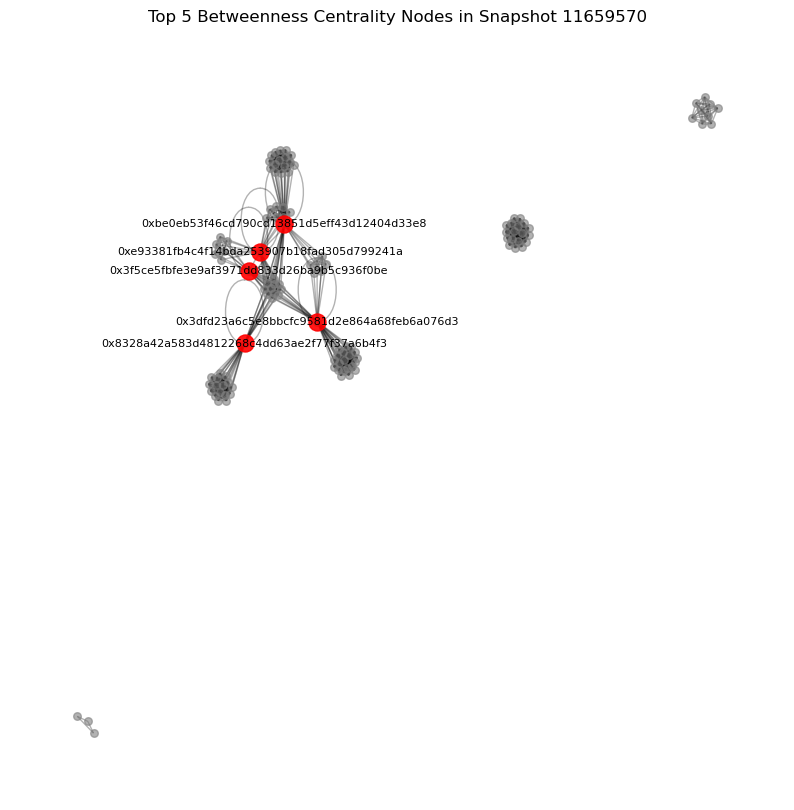

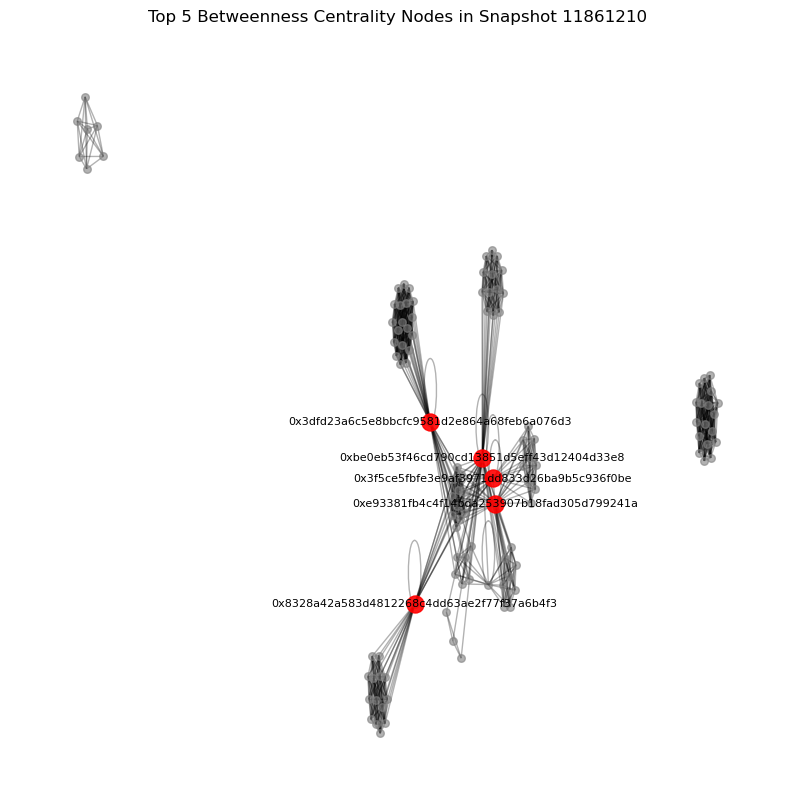

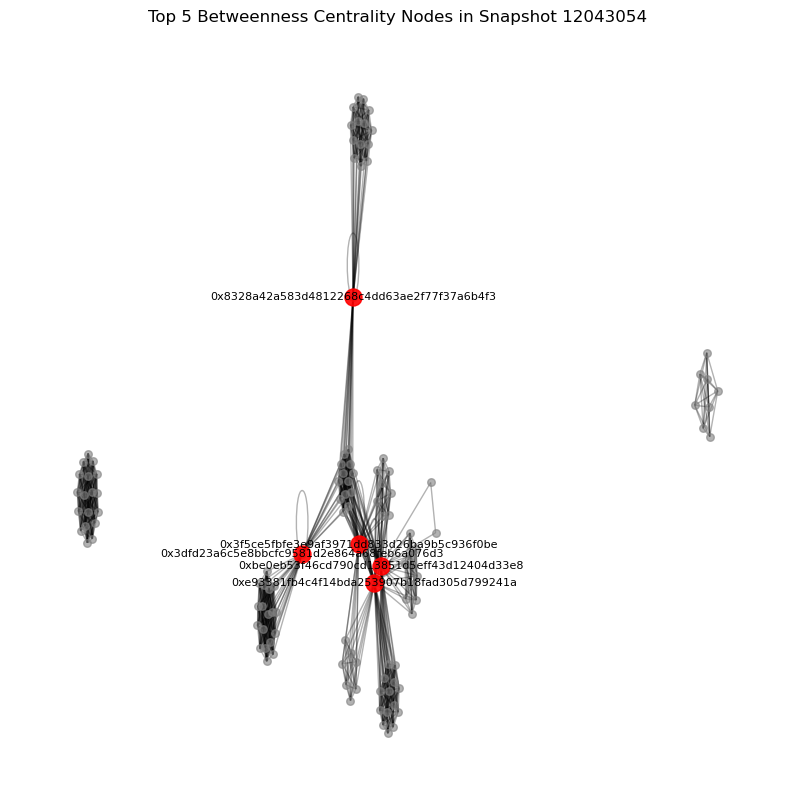

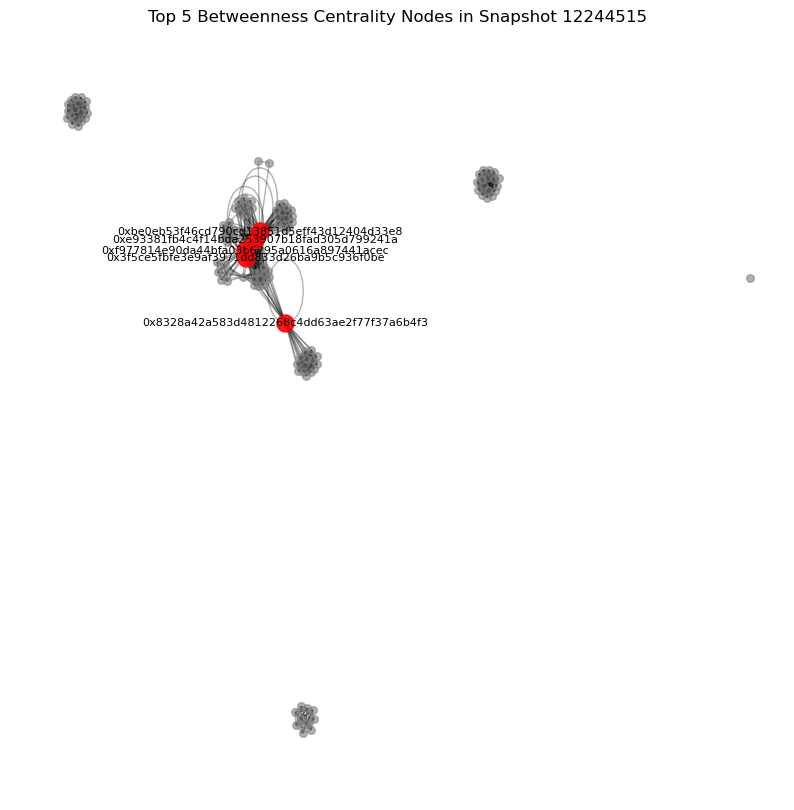

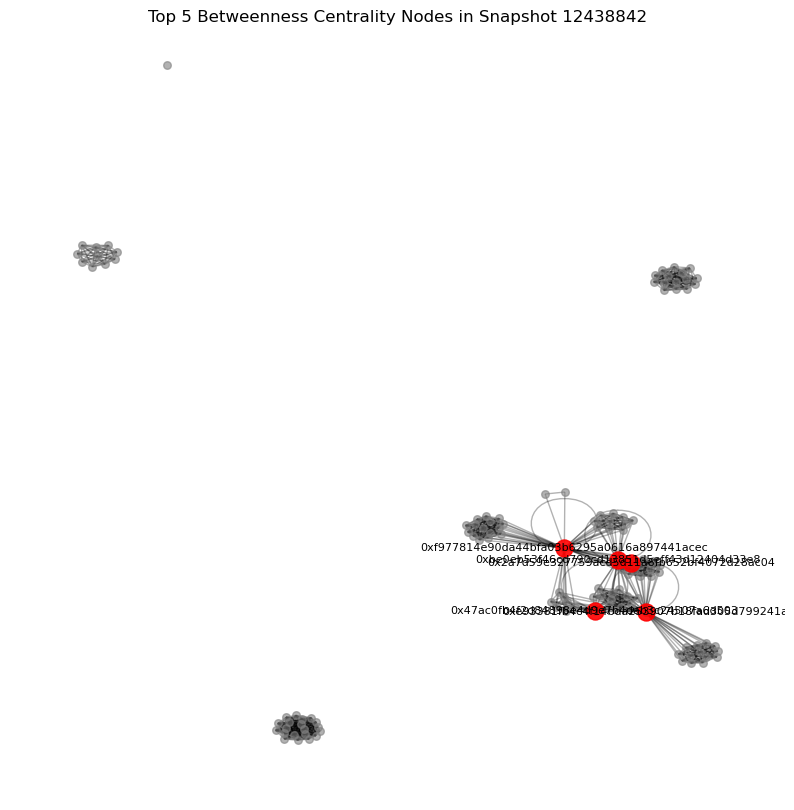

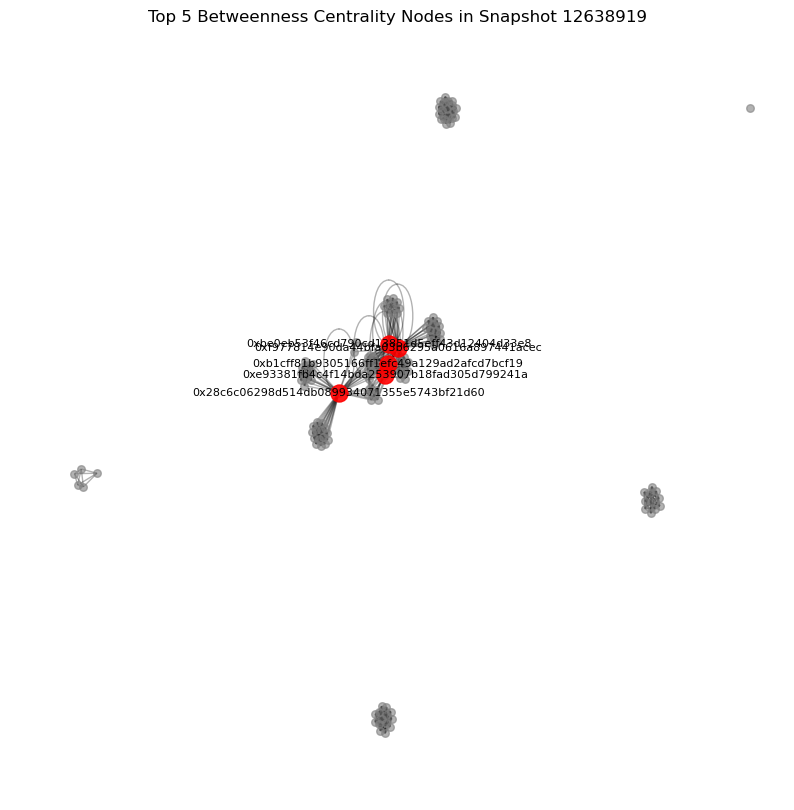

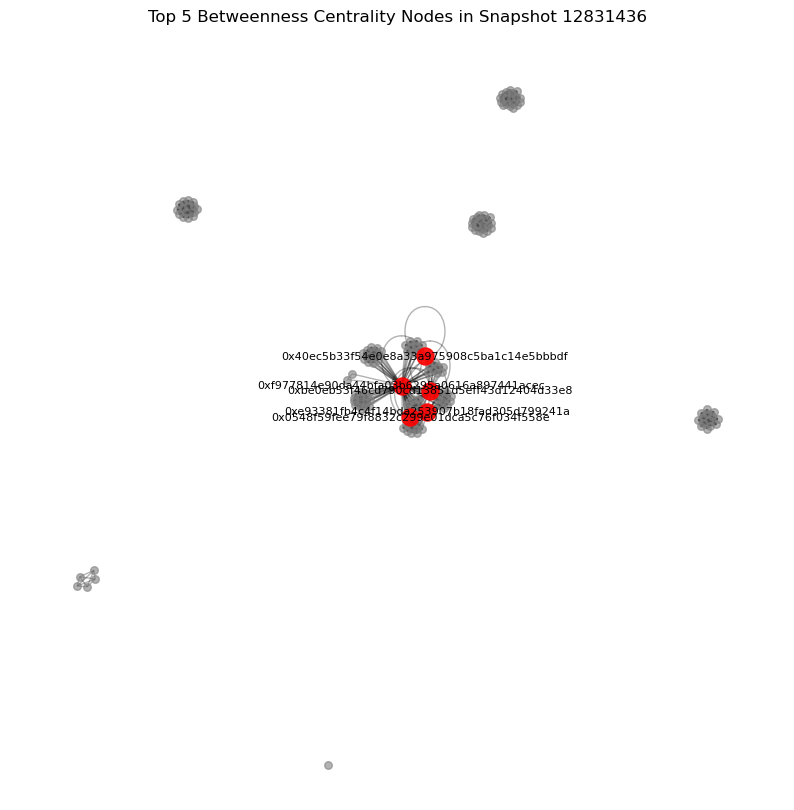

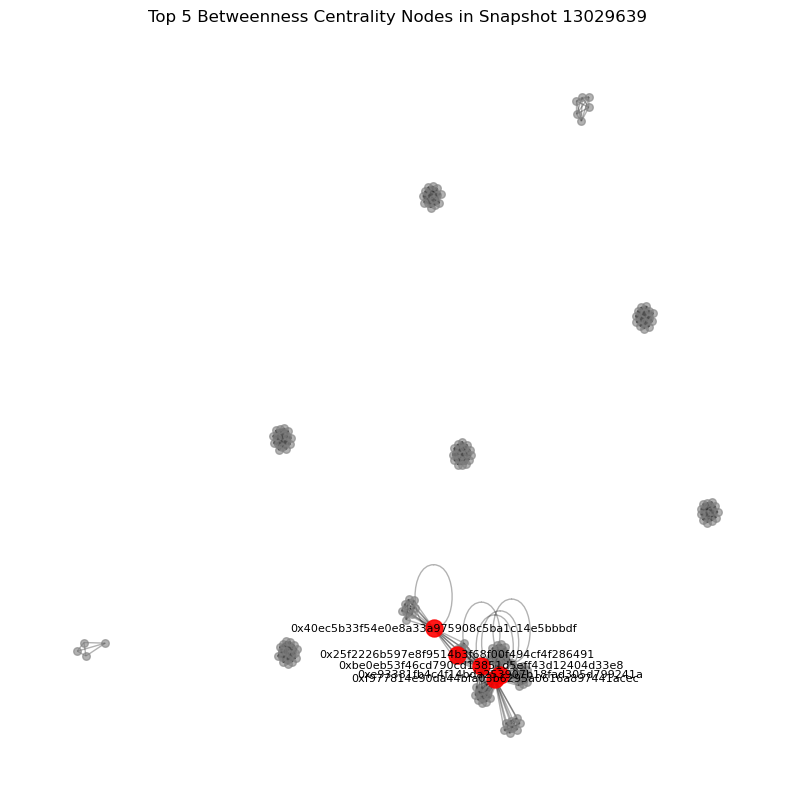

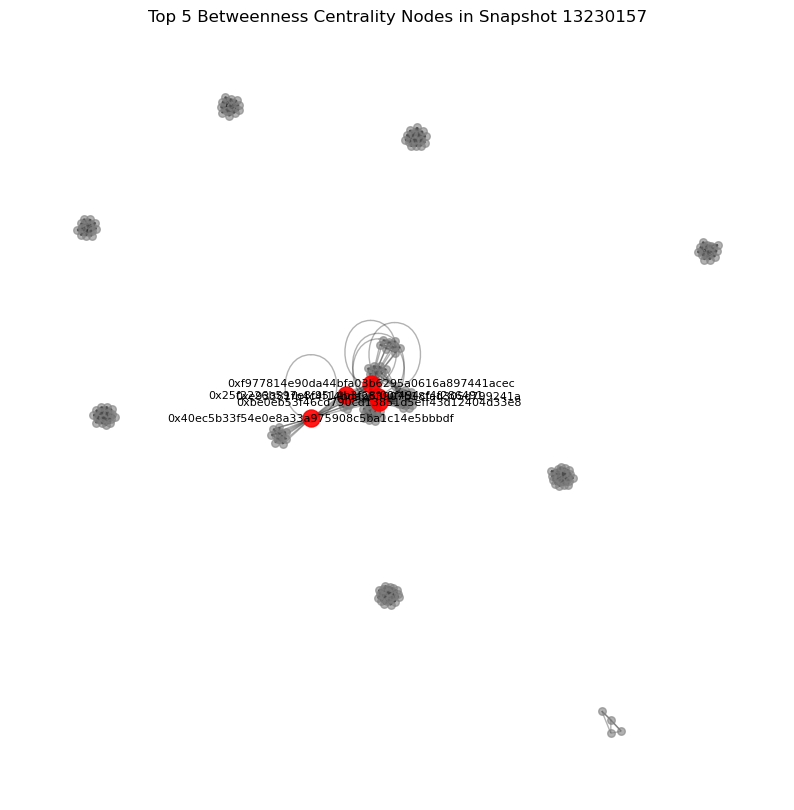

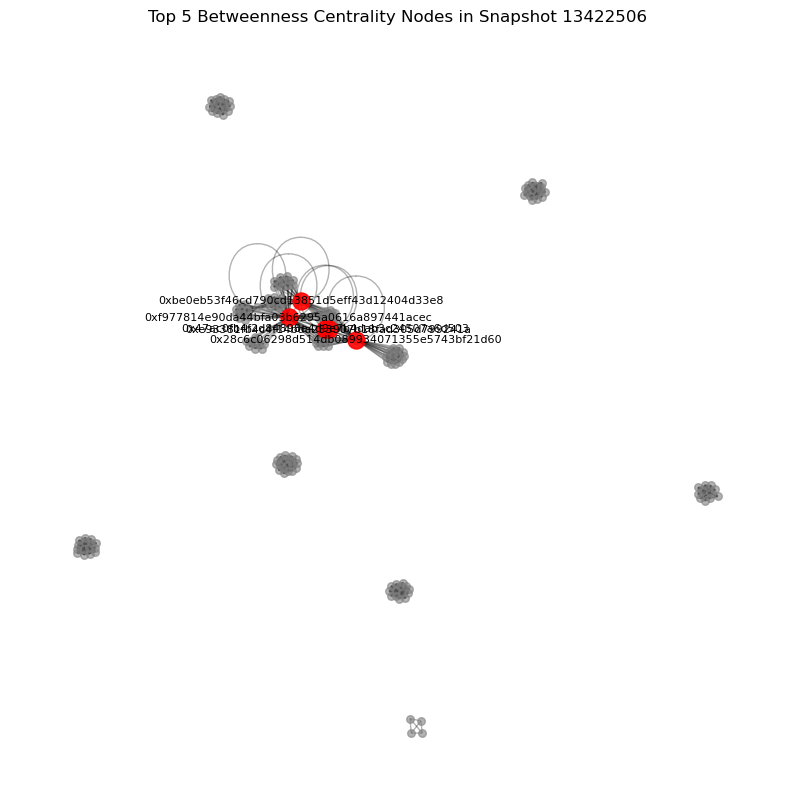

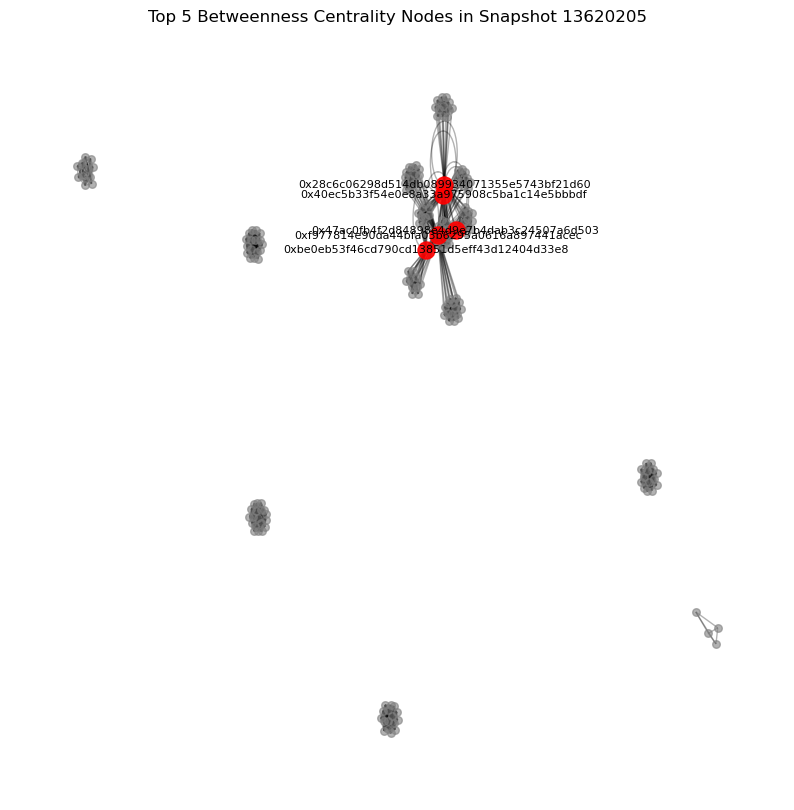

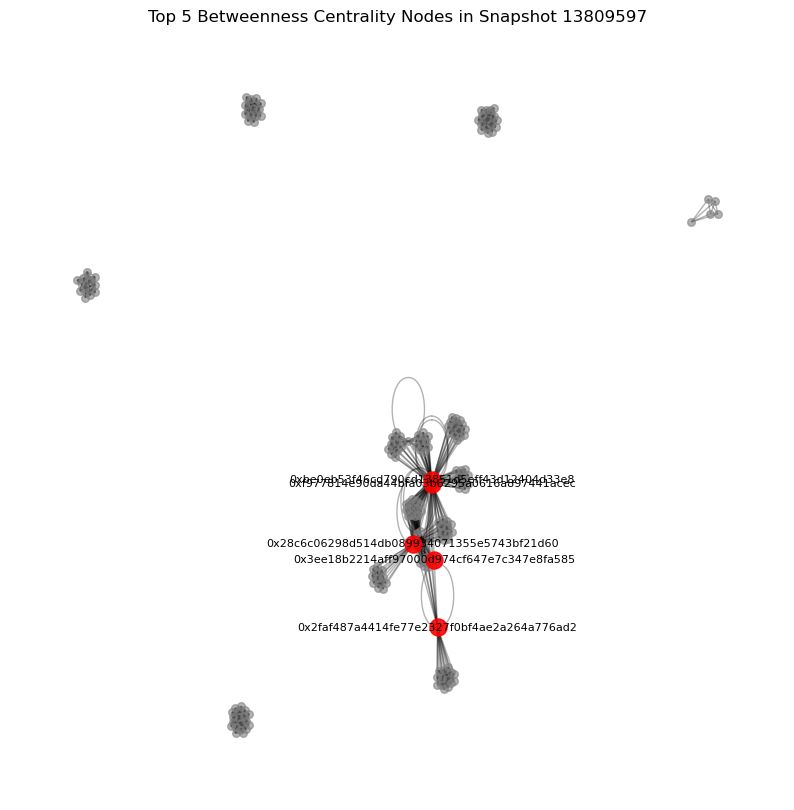

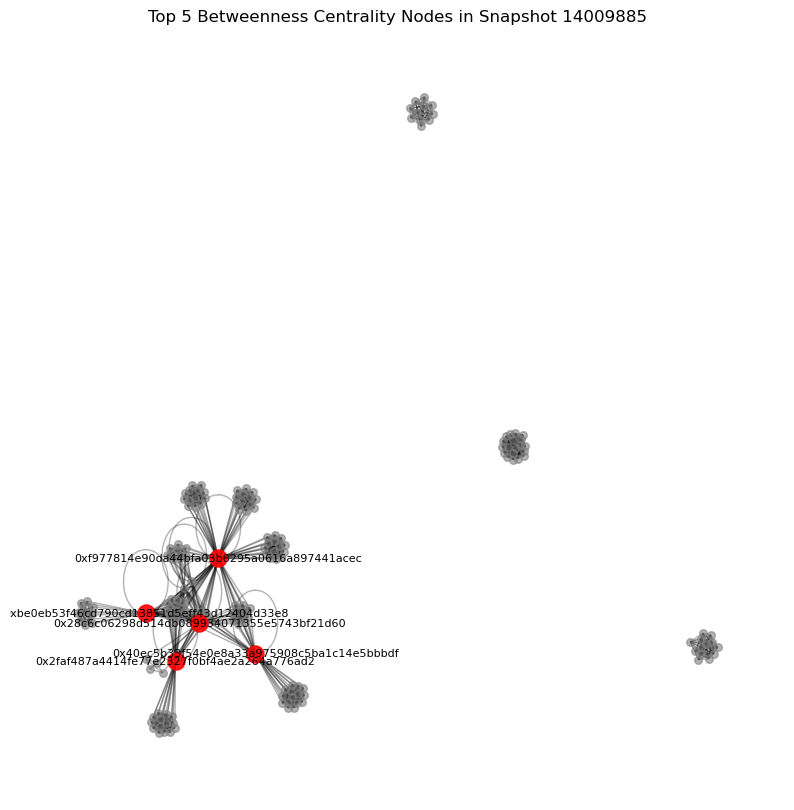

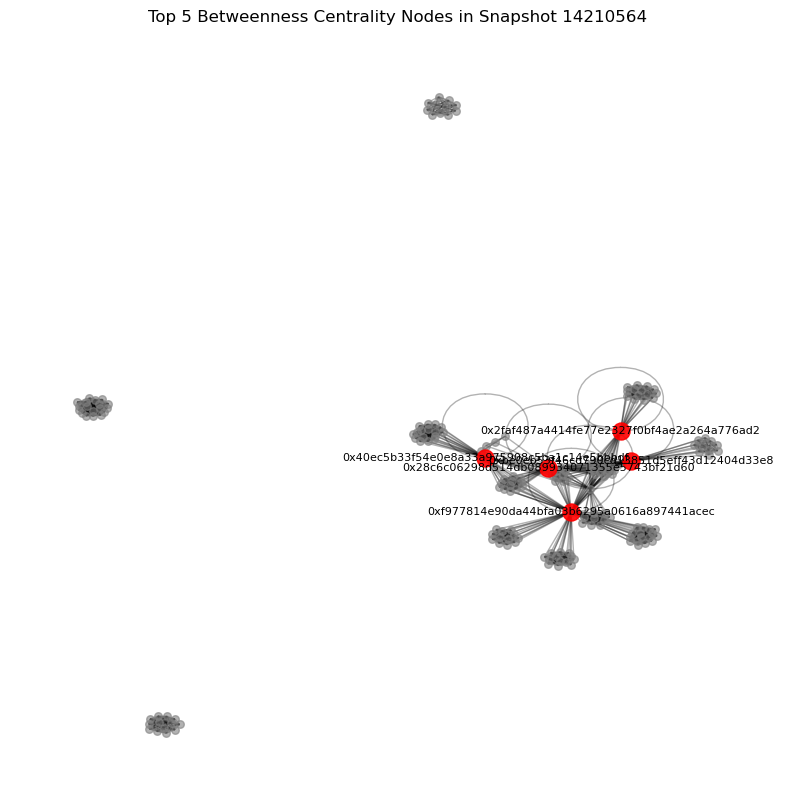

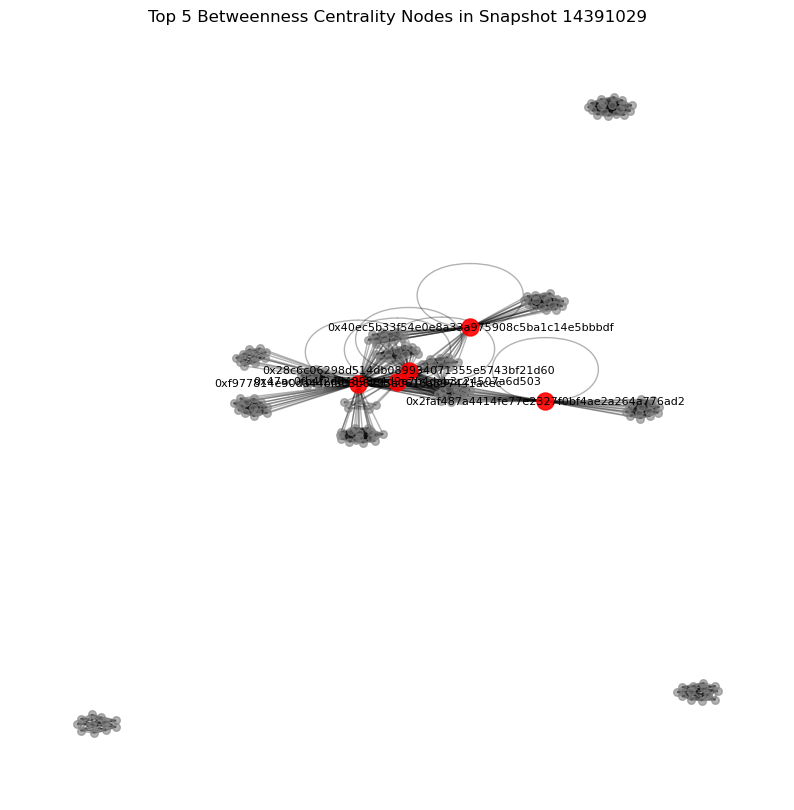

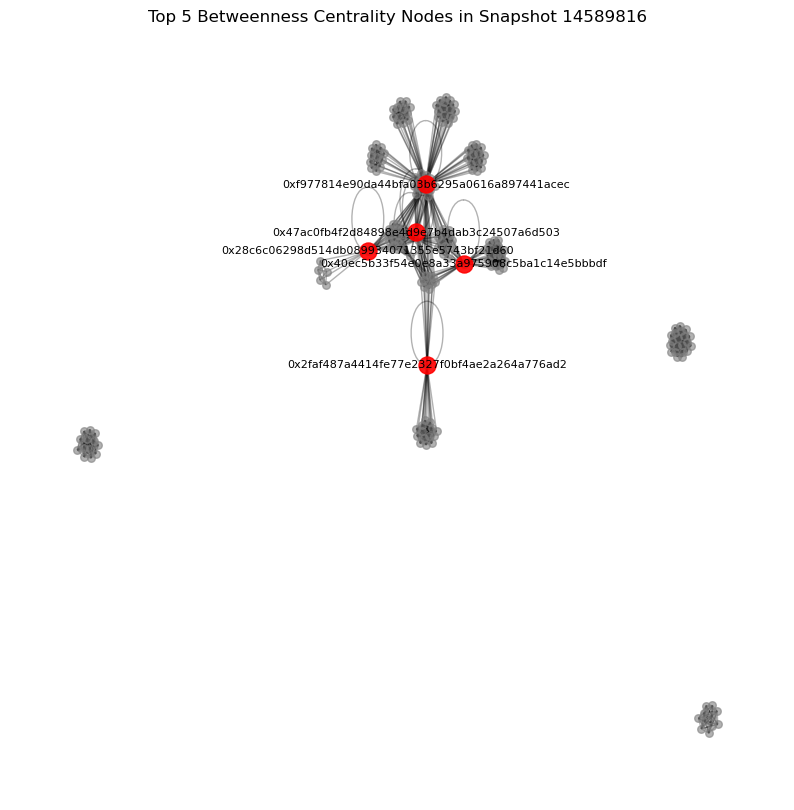

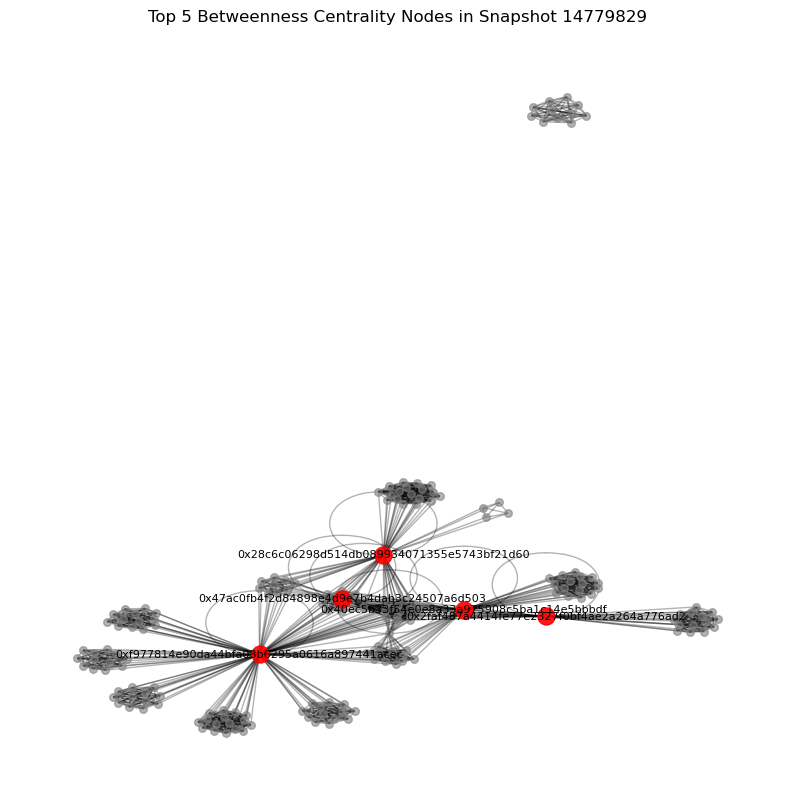

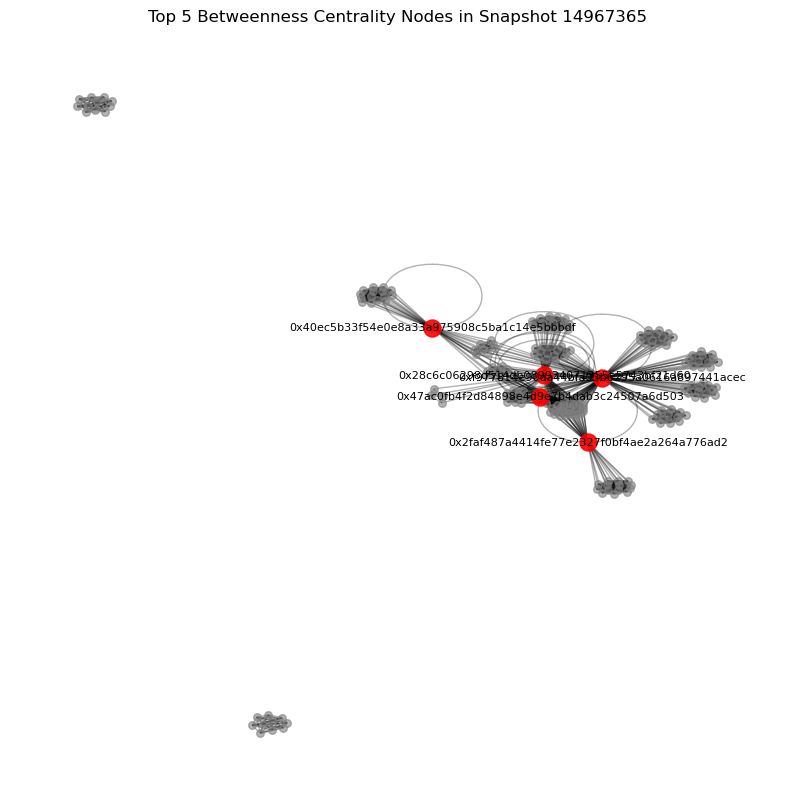

In [86]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join

# Function to calculate and find the top 5 nodes by betweenness centrality
def calculate_and_highlight_top_betweenness(graphs, top_n=5):
    top_nodes_data = []

    for snapshot, graph in graphs.items():
        # Calculate betweenness centrality for the graph
        betweenness_centrality = nx.betweenness_centrality(graph)
        
        # Sort nodes by betweenness centrality and select the top 5
        top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:top_n]
        
        for node, centrality in top_nodes:
            top_nodes_data.append({
                'Snapshot': snapshot,
                'Node': node,
                'Betweenness Centrality': centrality
            })

    # Convert the results to a DataFrame
    top_nodes_df = pd.DataFrame(top_nodes_data)
    return top_nodes_df

# Function to visualize the network with highlighted top nodes
def visualize_network_with_top_nodes(graph, top_nodes, title):
    plt.figure(figsize=(10, 10))

    # Position the nodes using spring layout
    pos = nx.spring_layout(graph)

    # Draw the full network with a default style
    nx.draw_networkx_edges(graph, pos, alpha=0.3)
    nx.draw_networkx_nodes(graph, pos, node_color='gray', node_size=30, alpha=0.6)

    # Highlight the top nodes
    top_node_positions = {node: pos[node] for node in top_nodes}
    nx.draw_networkx_nodes(graph, pos, nodelist=top_nodes, node_color='red', node_size=150, alpha=0.9)

    # Draw labels for top nodes
    nx.draw_networkx_labels(graph, pos, labels={node: node for node in top_nodes}, font_color='black', font_size=8)

    plt.title(title)
    plt.axis('off')
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')

# List of snapshot IDs corresponding to the graph files you have
snapshot_ids = [
    11659570, 11861210, 12043054, 12244515, 12438842, 12638919, 12831436, 13029639, 13230157, 13422506, 13620205, 13809597, 14009885, 14210564, 14391029, 14589816, 14779829, 14967365

]

# Load your graphs from files
graphs = {}
for snapshot in snapshot_ids:
    file_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
    if os.path.exists(file_path):
        graphs[snapshot] = nx.read_graphml(file_path)
    else:
        print(f"Graph file for snapshot {snapshot} not found at {file_path}")

# Calculate and find the top 5 nodes by betweenness centrality
top_nodes_df = calculate_and_highlight_top_betweenness(graphs)

# Visualize each snapshot with the top 5 nodes highlighted
for snapshot in snapshot_ids:
    graph = graphs.get(snapshot)
    if graph is not None:
        top_nodes = top_nodes_df[top_nodes_df['Snapshot'] == snapshot]['Node'].tolist()
        title = f'Top 5 Betweenness Centrality Nodes in Snapshot {snapshot}'
        visualize_network_with_top_nodes(graph, top_nodes, title)


In [78]:
import pandas as pd

# Assuming `top_nodes_df` was created in the previous code

# Display the top 5 nodes with the highest betweenness centrality for each snapshot
print("Top 5 Nodes with Highest Betweenness Centrality in Each Snapshot:")

# Sort by Snapshot and Betweenness Centrality for better readability
top_nodes_df_sorted = top_nodes_df.sort_values(by=['Snapshot', 'Betweenness Centrality'], ascending=[True, False])

# Print the DataFrame in a table format
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option('display.width', 1000)  # Adjust width to avoid line breaks
pd.set_option('display.max_rows', 50)  # Limit to showing 50 rows at a time
pd.set_option('display.colheader_justify', 'center')  # Center align the headers

# Print the sorted DataFrame
print(top_nodes_df_sorted)

# Optionally, display the top rows in a Jupyter Notebook environment
top_nodes_df_sorted.head(50)  # Display the first 50 rows if you're in a Jupyter Notebook


Top 5 Nodes with Highest Betweenness Centrality in Each Snapshot:
    Snapshot                     Node                     Betweenness Centrality
0   11659570  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.222453       
1   11659570  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.212855       
2   11659570  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.167403       
3   11659570  0xe93381fb4c4f14bda253907b18fad305d799241a         0.068725       
4   11659570  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.029418       
5   11861210  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.242822       
6   11861210  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.223378       
7   11861210  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.163717       
8   11861210  0xe93381fb4c4f14bda253907b18fad305d799241a         0.092175       
9   11861210  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.044706       
10  12043054  0x3dfd23a6c5e8bbcfc9581d2e864

Snapshot                     Node                     Betweenness Centrality
0   11659570  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.222453       
1   11659570  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.212855       
2   11659570  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.167403       
3   11659570  0xe93381fb4c4f14bda253907b18fad305d799241a         0.068725       
4   11659570  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.029418       
5   11861210  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.242822       
6   11861210  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.223378       
7   11861210  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.163717       
8   11861210  0xe93381fb4c4f14bda253907b18fad305d799241a         0.092175       
9   11861210  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.044706       
10  12043054  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.194966       
11  12043054  0xe93381fb4c4f14bda253907b18fad305d799241a         0.185884       
12  12043054  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.160183       
13  12043054  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.151767       
14  12043054  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.048487       
15  12244515  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.117373       
16  12244515  0xe93381fb4c4f14bda253907b18fad305d799241a         0.115281       
17  12244515  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.093153       
18  12244515  0xf977814e90da44bfa03b6295a0616a897441acec         0.023909       
19  12244515  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.009781       
20  12438842  0xf977814e90da44bfa03b6295a0616a897441acec         0.174330       
21  12438842  0xe93381fb4c4f14bda253907b18fad305d799241a         0.145243       
22  12438842  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.058329       
23  12438842  0x47ac0fb4f2d84898e4d9e7b4dab3c24507a6d503         0.009792       
24  12438842  0x2a7d59e327759acd5d11a8fb652bf4072d28ac04         0.004252       
25  12638919  0x28c6c06298d514db089934071355e5743bf21d60         0.185689       
26  12638919  0xf977814e90da44bfa03b6295a0616a897441acec         0.173634       
27  12638919  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.028023       
28  12638919  0xe93381fb4c4f14bda253907b18fad305d799241a         0.017068       
29  12638919  0xb1cff81b9305166ff1efc49a129ad2afcd7bcf19         0.007672       
30  12831436  0xf977814e90da44bfa03b6295a0616a897441acec         0.213230       
31  12831436  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.010753       
32  12831436  0xe93381fb4c4f14bda253907b18fad305d799241a         0.010522       
33  12831436  0x40ec5b33f54e0e8a33a975908c5ba1c14e5bbbdf         0.003016       
34  12831436  0x0548f59fee79f8832c299e01dca5c76f034f558e         0.002074       
35  13029639  0xf977814e90da44bfa03b6295a0616a897441acec         0.070520       
36  13029639  0x40ec5b33f54e0e8a33a975908c5ba1c14e5bbbdf         0.030960       
37  13029639  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.018377       
38  13029639  0xe93381fb4c4f14bda253907b18fad305d799241a         0.010344       
39  13029639  0x25f2226b597e8f9514b3f68f00f494cf4f286491         0.003697

In [89]:
import networkx as nx
import pandas as pd
from os.path import join

# Function to map node to token names
def map_nodes_to_tokens(top_nodes_df, graphs, token_info_path):
    # Load the token information
    token_info = pd.read_csv(token_info_path)
    token_info['address'] = token_info['address'].str.lower()  # Normalize case

    # Create a dictionary to map token addresses to token names
    token_map = token_info.set_index('address')['name'].to_dict()

    token_data = []

    for index, row in top_nodes_df.iterrows():
        snapshot = row['Snapshot']
        node = row['Node']

        # Get the graph for the current snapshot
        graph = graphs.get(snapshot)

        if graph is not None and node in graph:
            # Get the token address associated with this node (wallet)
            token_address = graph.nodes[node].get('token_address', '').lower()

            # Map the token address to the token name
            token_name = token_map.get(token_address, 'Unknown Token')

            # Append to the list
            token_data.append({
                'Snapshot': snapshot,
                'Node': node,
                'Betweenness Centrality': row['Betweenness Centrality'],
                'Token': token_name
            })

    return pd.DataFrame(token_data)

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# List of snapshot IDs corresponding to the graph files you have
snapshot_ids = [
    11659570, 11861210, 12043054, 12244515, 12438842, 12638919, 12831436, 13029639, 13230157, 13422506, 13620205, 13809597, 14009885, 14210564, 14391029, 14589816, 14779829, 14967365

]

# Load your graphs from files
graphs = {}
for snapshot in snapshot_ids:
    file_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
    if os.path.exists(file_path):
        graphs[snapshot] = nx.read_graphml(file_path)
    else:
        print(f"Graph file for snapshot {snapshot} not found at {file_path}")

# Calculate and find the top 5 nodes by betweenness centrality
top_nodes_df = calculate_and_highlight_top_betweenness(graphs)

# Map nodes to tokens
top_nodes_with_tokens_df = map_nodes_to_tokens(top_nodes_df, graphs, token_info_path)

# Display the final DataFrame with tokens
print(top_nodes_with_tokens_df)

# Optionally, save the results to a CSV file
output_path = join(data_directory, 'top_nodes_with_tokens.csv')
top_nodes_with_tokens_df.to_csv(output_path, index=False)


    Snapshot                     Node                     Betweenness Centrality   Token  
0   11659570  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.222453            Curve
1   11659570  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.212855            Maker
2   11659570  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.167403         Compound
3   11659570  0xe93381fb4c4f14bda253907b18fad305d799241a         0.068725            Curve
4   11659570  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.029418            Sushi
5   11861210  0xbe0eb53f46cd790cd13851d5eff43d12404d33e8         0.242822            Curve
6   11861210  0x3dfd23a6c5e8bbcfc9581d2e864a68feb6a076d3         0.223378            Maker
7   11861210  0x8328a42a583d4812268c4dd63ae2f77f37a6b4f3         0.163717         Compound
8   11861210  0xe93381fb4c4f14bda253907b18fad305d799241a         0.092175            Curve
9   11861210  0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be         0.044706            Sushi

In [35]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

# Assuming `map_nodes_to_tokens` and other previous functions have been defined

def compare_token_distributions(top_nodes_with_tokens_df):
    # Group by Snapshot and Token to count occurrences of each token among central nodes
    token_distribution = top_nodes_with_tokens_df.groupby(['Snapshot', 'Token']).size().reset_index(name='Count')

    # Pivot the data for easier comparison
    token_distribution_pivot = token_distribution.pivot(index='Token', columns='Snapshot', values='Count').fillna(0)

    # Normalize the distributions by row to get proportions
    token_distribution_pivot = token_distribution_pivot.div(token_distribution_pivot.sum(axis=1), axis=0)

    # Plot the distribution as a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(token_distribution_pivot, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title('Token Distribution Among Central Nodes Across Snapshots')
    plt.xlabel('Snapshot')
    plt.ylabel('Token')
    plt.show()

# Path setup
data_directory = '/Users/liamk/Desktop/DATA_DIRECTORY/data'
graph_directory = join(data_directory, 'validated_wallet_projection_graphs_enriched')
token_info_path = join(data_directory, 'final_token_selection.csv')

# List of snapshot IDs corresponding to the graph files you have
snapshot_ids = [
    11659570, 11861210, 12043054, 12244515, 12438842, 12638919, 12831436, 13029639, 13230157, 13422506, 13620205, 13809597, 14009885, 14210564, 14391029, 14589816, 14779829, 14967365

]

# Load your graphs from files
graphs = {}
for snapshot in snapshot_ids:
    file_path = join(graph_directory, f'validated_wallet_projection_graph_{snapshot}.graphml')
    if os.path.exists(file_path):
        graphs[snapshot] = nx.read_graphml(file_path)
    else:
        print(f"Graph file for snapshot {snapshot} not found at {file_path}")

# Calculate and find the top 5 nodes by betweenness centrality
top_nodes_df = calculate_and_highlight_top_betweenness(graphs)

# Map nodes to tokens
top_nodes_with_tokens_df = map_nodes_to_tokens(top_nodes_df, graphs, token_info_path)

# Compare token distributions for central nodes
compare_token_distributions(top_nodes_with_tokens_df)


NameError: name 'calculate_and_highlight_top_betweenness' is not defined

# It seems like some tokens are missing...

In [34]:
def map_nodes_to_tokens(top_nodes_df, graphs, token_info_path):
    # Load the token information
    token_info = pd.read_csv(token_info_path)
    token_info['address'] = token_info['address'].str.lower()  # Normalize case

    # Create a dictionary to map token addresses to token names
    token_map = token_info.set_index('address')['name'].to_dict()

    token_data = []
    unique_tokens = set()

    for index, row in top_nodes_df.iterrows():
        snapshot = row['Snapshot']
        node = row['Node']

        # Get the graph for the current snapshot
        graph = graphs.get(snapshot)

        if graph is not None and node in graph:
            # Get the token address associated with this node (wallet)
            token_address = graph.nodes[node].get('token_address', '').lower()

            # Map the token address to the token name
            token_name = token_map.get(token_address, 'Unknown Token')
            unique_tokens.add(token_name)

            # Append to the list
            token_data.append({
                'Snapshot': snapshot,
                'Node': node,
                'Betweenness Centrality': row['Betweenness Centrality'],
                'Token': token_name
            })

    # Print all unique tokens found
    print("Unique tokens mapped:", unique_tokens)

    return pd.DataFrame(token_data)

# After running the rest of your code, call the function and inspect the output.
top_nodes_with_tokens_df = map_nodes_to_tokens(top_nodes_df, graphs, token_info_path)


NameError: name 'top_nodes_df' is not defined

Unique tokens mapped: {'Maker', 'Curve', 'Balancer', 'Compound', 'Bitdao', 'Convex', 'Sushi', 'Aave', 'Dydx'}
Missing token mappings for the following nodes:


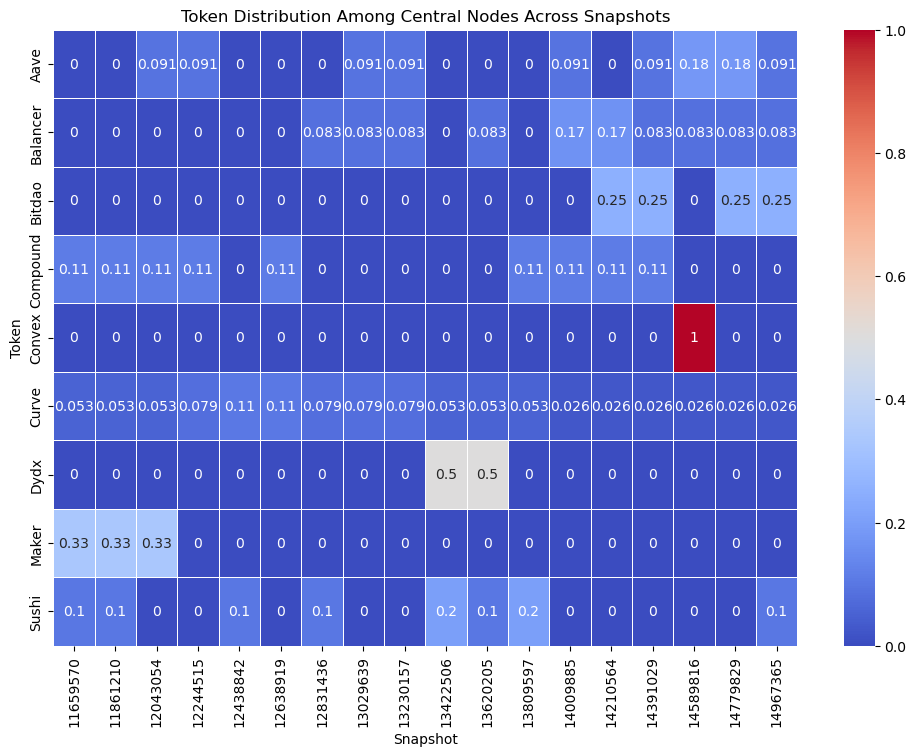

In [92]:
import networkx as nx
import pandas as pd
from os.path import join

def map_nodes_to_tokens(top_nodes_df, graphs, token_info_path):
    # Load the token information
    token_info = pd.read_csv(token_info_path)
    token_info['address'] = token_info['address'].str.lower()  # Normalize case

    # Create a dictionary to map token addresses to token names
    token_map = token_info.set_index('address')['name'].to_dict()

    token_data = []
    unique_tokens = set()
    missing_tokens = []

    for index, row in top_nodes_df.iterrows():
        snapshot = row['Snapshot']
        node = row['Node']

        # Get the graph for the current snapshot
        graph = graphs.get(snapshot)

        if graph is not None and node in graph:
            # Get the token address associated with this node (wallet)
            token_address = graph.nodes[node].get('token_address', '').lower()

            # Map the token address to the token name
            token_name = token_map.get(token_address, None)
            
            if token_name:
                unique_tokens.add(token_name)
            else:
                token_name = 'Unknown Token'
                missing_tokens.append((node, token_address))
            
            # Append to the list
            token_data.append({
                'Snapshot': snapshot,
                'Node': node,
                'Betweenness Centrality': row['Betweenness Centrality'],
                'Token': token_name
            })

    # Print all unique tokens found and missing tokens
    print("Unique tokens mapped:", unique_tokens)
    print("Missing token mappings for the following nodes:")
    for node, token_address in missing_tokens:
        print(f"Node: {node}, Token Address: {token_address}")

    return pd.DataFrame(token_data)

# Run the mapping and check for missing tokens
top_nodes_with_tokens_df = map_nodes_to_tokens(top_nodes_df, graphs, token_info_path)

# After running the rest of your code, inspect the output.
compare_token_distributions(top_nodes_with_tokens_df)


In [36]:
import networkx as nx
import pandas as pd
from os.path import join

def map_nodes_to_tokens(top_nodes_df, graphs, token_info_path):
    # Load the token information
    token_info = pd.read_csv(token_info_path)
    token_info['address'] = token_info['address'].str.lower()  # Normalize case

    # Create a dictionary to map token addresses to token names
    token_map = token_info.set_index('address')['name'].to_dict()

    token_data = []
    unique_tokens = set()
    missing_tokens = []

    for index, row in top_nodes_df.iterrows():
        snapshot = row['Snapshot']
        node = row['Node']

        # Get the graph for the current snapshot
        graph = graphs.get(snapshot)

        if graph is not None and node in graph:
            # Get the token address associated with this node (wallet)
            token_address = graph.nodes[node].get('token_address', '').lower()

            # Map the token address to the token name
            token_name = token_map.get(token_address, None)
            
            if token_name:
                unique_tokens.add(token_name)
            else:
                token_name = 'Unknown Token'
                missing_tokens.append((node, token_address))
            
            # Append to the list
            token_data.append({
                'Snapshot': snapshot,
                'Node': node,
                'Betweenness Centrality': row['Betweenness Centrality'],
                'Token': token_name
            })

    # Print all unique tokens found and missing tokens
    print("Unique tokens mapped:", unique_tokens)
    print("Missing token mappings for the following nodes:")
    for node, token_address in missing_tokens:
        print(f"Node: {node}, Token Address: {token_address}")

    return pd.DataFrame(token_data)

# Run the mapping and check for missing tokens
top_nodes_with_tokens_df = map_nodes_to_tokens(top_nodes_df, graphs, token_info_path)


NameError: name 'top_nodes_df' is not defined